## 回归

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

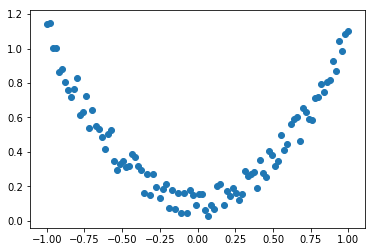

In [2]:
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.2*torch.rand(x.size())

x,y=Variable(x),Variable(y)

plt.scatter(x.data.numpy(),y.data.numpy())

In [12]:
class Net(torch.nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

In [13]:
net=Net(1,10,1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


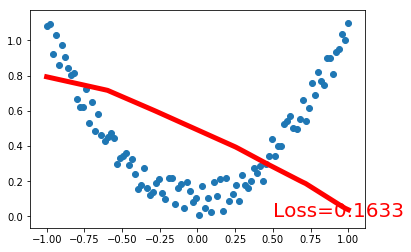

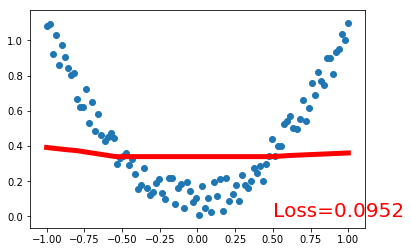

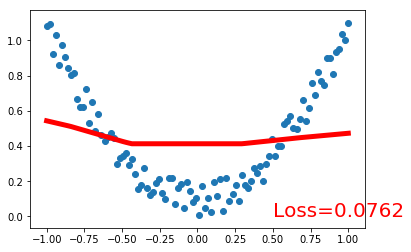

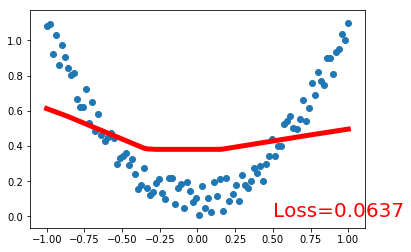

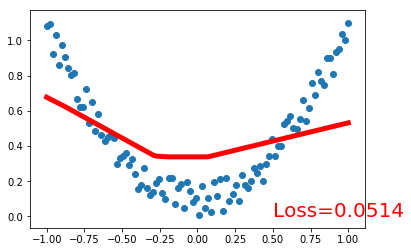

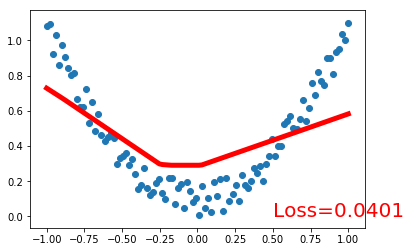

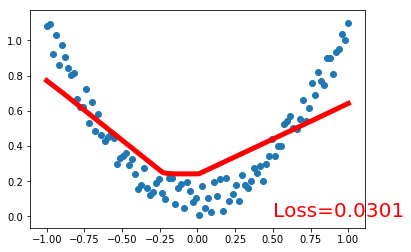

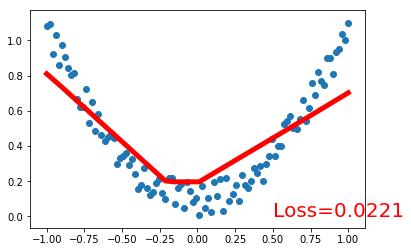

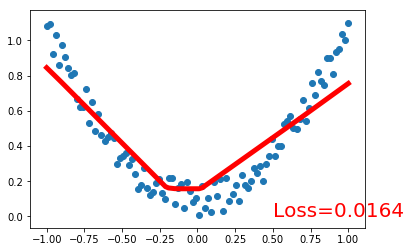

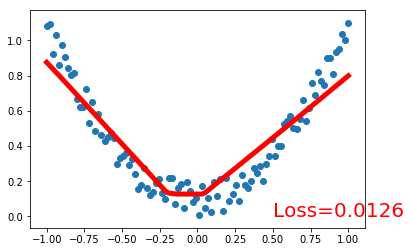

In [14]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.5)
loss_func=torch.nn.MSELoss()
plt.ion()
plt.show()

for t in range(50):
    prediction=net(x)
    loss=loss_func(prediction,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%5==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss=%.4f'%loss.data[0],fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
    plt.ioff()
    plt.show()

## 分类

In [26]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

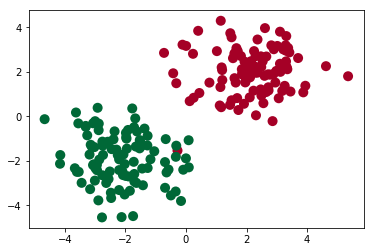

In [27]:
n_data=torch.ones(100,2)
x0=torch.normal(2*n_data,1)
y0=torch.zeros(100)
x1=torch.normal(-2*n_data,1)
y1=torch.ones(100)
x=torch.cat((x0,x1),0).type(torch.FloatTensor)
y=torch.cat((y0,y1),).type(torch.LongTensor)

x,y=Variable(x),Variable(y)

plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(),s=100,lw=0,cmap='RdYlGn')

In [28]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.out=torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.out(x)
        return x

In [29]:
net=Net(2,10,2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [30]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.02)
loss_func=torch.nn.CrossEntropyLoss()

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


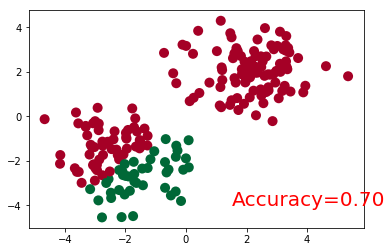

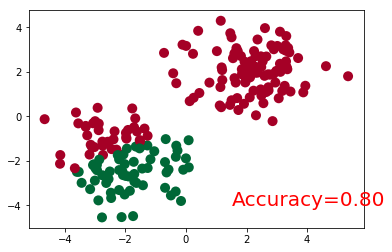

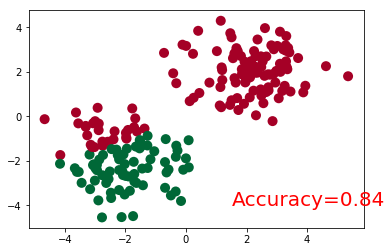

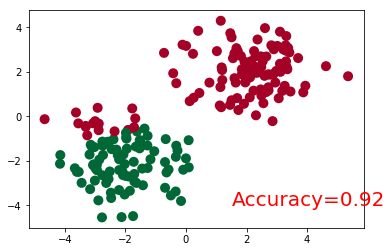

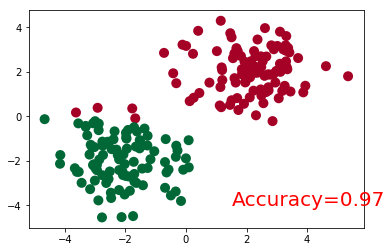

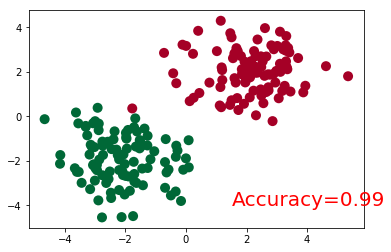

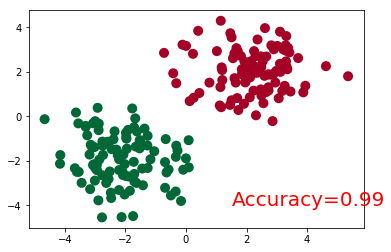

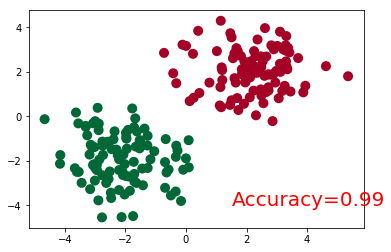

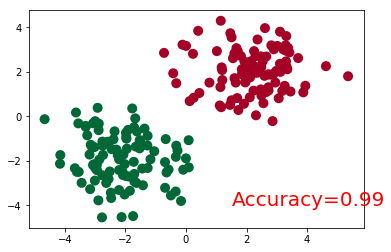

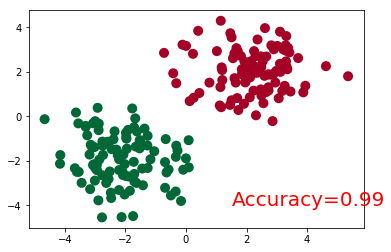

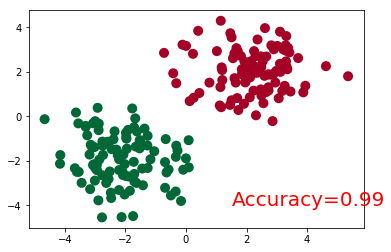

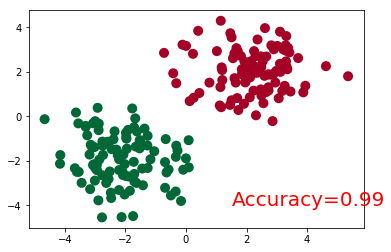

In [31]:
plt.ion()
for t in range(100):
    out=net(x)
    loss=loss_func(out,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%10==0 or t in [3,6]:
        plt.cla()
#         print(out)
        _,prediction=torch.max(F.softmax(out),1)
        pred_y=prediction.data.numpy().squeeze()
        target_y=y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=100,lw=0,cmap='RdYlGn')
        accuracy=sum(pred_y==target_y)/200
        plt.text(1.5,-4,'Accuracy=%.2f'% accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
plt.ioff()

## 快速搭建法

In [ ]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.out=torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.out(x)
        return x

In [32]:
net1=Net(2,10,2)
net2=torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2)
)
print(net1)
print(net2)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


## 模型存储

In [54]:
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.2*torch.rand(x.size())
x,y=Variable(x,requires_grad=False),Variable(y,requires_grad=False)

In [55]:
def save():
    net1=torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer=torch.optim.SGD(net1.parameters(),lr=0.5)
    loss_func=torch.nn.MSELoss()
    for t in range(100):
        prediction=net1(x)
        loss=loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    torch.save(net1,'net.pkl')
    torch.save(net1.state_dict(),'net_parameters.pkl')
    
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [57]:
def restore_net():
    net2=torch.load('net.pkl')
    prediction=net2(x)
    
    plt.figure(1, figsize=(10, 3))
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [58]:
def restore_params():
    net3=torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    net3.load_state_dict(torch.load('net_parameters.pkl'))
    prediction=net3(x)
    
    plt.figure(1, figsize=(10, 3))
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

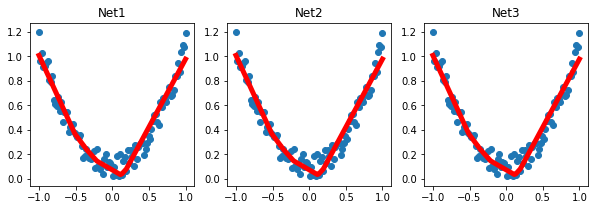

In [59]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()

## 批数据训练

In [60]:
import torch
import torch.utils.data as Data

In [65]:
BATCH_SIZE=5

x=torch.linspace(1,10,10)
y=torch.linspace(10,1,10)

torch_dataset=Data.TensorDataset(x,y)
loader=Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

for epoch in range(3):
    for step,(batch_x,batch_y) in enumerate(loader):
        print('Epoch:',epoch,'|Step:',step,'|batch x:',batch_x.numpy(),'| batch y:',batch_y.numpy())

Epoch: 0 |Step: 0 |batch x: [2. 9. 4. 3. 8.] | batch y: [9. 2. 7. 8. 3.]
Epoch: 0 |Step: 1 |batch x: [10.  7.  1.  5.  6.] | batch y: [ 1.  4. 10.  6.  5.]
Epoch: 1 |Step: 0 |batch x: [4. 8. 7. 3. 2.] | batch y: [7. 3. 4. 8. 9.]
Epoch: 1 |Step: 1 |batch x: [10.  6.  5.  9.  1.] | batch y: [ 1.  5.  6.  2. 10.]
Epoch: 2 |Step: 0 |batch x: [10.  8.  3.  6.  9.] | batch y: [1. 3. 8. 5. 2.]
Epoch: 2 |Step: 1 |batch x: [7. 4. 2. 1. 5.] | batch y: [ 4.  7.  9. 10.  6.]


## 优化器

In [81]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [82]:
LR=0.01
BATCH_SIZE=32
EPCOH=12

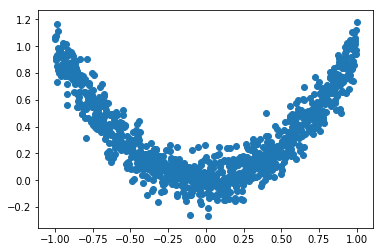

In [83]:
x=torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y=x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))

plt.scatter(x.numpy(),y.numpy())

In [84]:
torch_dataset=Data.TensorDataset(x,y)
loader=Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [85]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(1,20)
        self.predict=torch.nn.Linear(20,1)
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

0


C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


1
2
3
4
5
6
7
8
9
10
11


(0, 0.2)

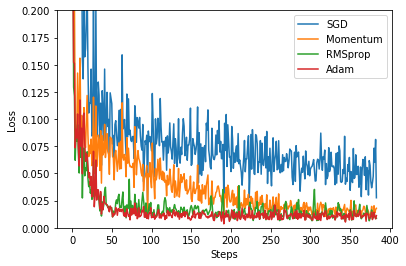

In [86]:
net_SGD=Net()
net_Momentum=Net()
net_RMSprop=Net()
net_Adam=Net()
nets=[net_SGD,net_Momentum,net_RMSprop,net_Adam]


opt_SGD=torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum=torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_RMSprop=torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam=torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers=[opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]

loss_func=torch.nn.MSELoss()
losses_his=[[],[],[],[]]

for epoch in range(EPCOH):
    print(epoch)
    for step,(batch_x,batch_y) in enumerate(loader):
        b_x=Variable(batch_x)
        b_y=Variable(batch_y)
        
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            output=net(b_x)
            loss=loss_func(output,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data[0])

labels=['SGD','Momentum','RMSprop','Adam']
for i,l_his in enumerate(losses_his):
    plt.plot(l_his,label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))

## 卷积神经网络

In [101]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [91]:
EPOCH=1
BATCH_SIZE=50
LR=0.001
DOWNLOAD_MNIST=True

In [92]:
train_data=torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)

Processing...
Done!


torch.Size([60000, 28, 28])
torch.Size([60000])


Text(0.5,1,'5')

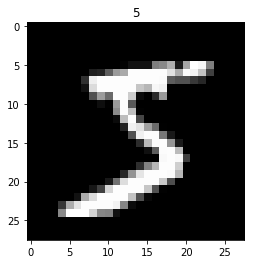

In [93]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(),cmap='gray')
plt.title('%i'%train_data.train_labels[0])

In [94]:
train_loader=Data.DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True,
                             num_workers=2
                            )

In [99]:
test_data=torchvision.datasets.MNIST(
    root='./mnist',
    train=False
)
test_x=Variable(torch.unsqueeze(test_data.test_data,dim=1)).type(torch.FloatTensor)[:2000]/255
test_y=test_data.test_labels[:2000]

In [103]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.con1=nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.con2=nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.out=nn.Linear(32*7*7,10)
    def forward(self,x):
        x=self.con1(x)
        x=self.con2(x)
        x=x.view(x.size(0),-1)
        output=self.out(x)
        return output

In [104]:
cnn=CNN()
print(cnn)

CNN(
  (con1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (con2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [105]:
optimizer=torch.optim.Adam(cnn.parameters(),lr=LR)
loss_func=nn.CrossEntropyLoss()

In [108]:
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        b_x=Variable(x)
        b_y=Variable(y)
        
        output=cnn(b_x)
        loss=loss_func(output,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%50==0:
            test_output=cnn(test_x)
            pred_y=torch.max(test_output,1)[1].data.squeeze()
            accuracy=(pred_y==test_y).sum().item()/float(test_y.size(0))
            print('Epoch:',epoch,'|train loss:%.4f'%loss.data[0],'| test accuracy:%.2f'%accuracy)
test_output=cnn(test_x[:10])
pred_y=torch.max(test_output,1)[1].data.numpy().squeeze()
print(pred_y,'prediction number')
print(test_y[:10].numpy(),'real number')

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch: 0 |train loss:2.2872 | test accuracy:0.22
Epoch: 0 |train loss:0.4057 | test accuracy:0.84
Epoch: 0 |train loss:0.1418 | test accuracy:0.90
Epoch: 0 |train loss:0.2308 | test accuracy:0.92
Epoch: 0 |train loss:0.1425 | test accuracy:0.94
Epoch: 0 |train loss:0.3349 | test accuracy:0.93
Epoch: 0 |train loss:0.1591 | test accuracy:0.95
Epoch: 0 |train loss:0.0501 | test accuracy:0.95
Epoch: 0 |train loss:0.0564 | test accuracy:0.96
Epoch: 0 |train loss:0.0838 | test accuracy:0.96
Epoch: 0 |train loss:0.0599 | test accuracy:0.97
Epoch: 0 |train loss:0.0703 | test accuracy:0.97
Epoch: 0 |train loss:0.0309 | test accuracy:0.96
Epoch: 0 |train loss:0.0613 | test accuracy:0.96
Epoch: 0 |train loss:0.0247 | test accuracy:0.97
Epoch: 0 |train loss:0.0999 | test accuracy:0.97
Epoch: 0 |train loss:0.0385 | test accuracy:0.97
Epoch: 0 |train loss:0.0484 | test accuracy:0.97
Epoch: 0 |train loss:0.0489 | test accuracy:0.98
Epoch: 0 |train loss:0.0908 | test accuracy:0.97
Epoch: 0 |train loss

## 循环神经网络

In [137]:
EPOCH=1
BATCH_SIZE=64
TIME_STEP=28
INPUT_SIZE=28
LR=0.01
DOWNLOAD_MNIST=False

In [138]:
train_data=torchvision.datasets.MNIST(root='./mnist',
                                      train=True,
                                      transform=torchvision.transforms.ToTensor(),
                                     download=DOWNLOAD_MNIST)
train_loader=torch.utils.data.DataLoader(dataset=train_data,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         num_workers=2)

In [139]:
test_data=torchvision.datasets.MNIST(
    root='./mnist',
    train=False,
    transform=torchvision.transforms.ToTensor()
)
test_x=Variable(test_data.test_data,volatile=True).type(torch.FloatTensor)[:2000]/255
test_y=test_data.test_labels[:2000]

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


In [140]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn=nn.LSTM(input_size=INPUT_SIZE,
                         hidden_size=64,
                         num_layers=1,
                         batch_first=True)
        self.out=nn.Linear(64,10)
    def forward(self,x):
        r_out,(h_n,h_c)=self.rnn(x,None)
        out=self.out(r_out[:,-1,:])
        return out

In [141]:
rnn=RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [142]:
optimizer=torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func=nn.CrossEntropyLoss()

In [144]:
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        b_x=Variable(x.view(-1,28,28))
        b_y=Variable(y)
        output=rnn(b_x)
        
        loss=loss_func(output,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%50==0:
            test_output=rnn(test_x)
            pred_y=torch.max(test_output,1)[1].data.numpy().squeeze()
            accuracy=(pred_y==test_y).sum().item()/float(test_y.size(0))
            print('Epoch:',epoch,'|train loss:%.4f'%loss.data[0],'| test accuracy:%.2f'%accuracy)
test_output=rnn(test_x[:10].view(-1,28,28))
pred_y=torch.max(test_output,1)[1].data.numpy().squeeze()
print(pred_y,'prediction number')
print(test_y[:10].numpy(),'real number')            

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch: 0 |train loss:0.2230 | test accuracy:0.94
Epoch: 0 |train loss:0.1765 | test accuracy:0.94
Epoch: 0 |train loss:0.0904 | test accuracy:0.96
Epoch: 0 |train loss:0.1842 | test accuracy:0.94
Epoch: 0 |train loss:0.1058 | test accuracy:0.96
Epoch: 0 |train loss:0.1002 | test accuracy:0.95
Epoch: 0 |train loss:0.2000 | test accuracy:0.97
Epoch: 0 |train loss:0.0392 | test accuracy:0.96
Epoch: 0 |train loss:0.1033 | test accuracy:0.95
Epoch: 0 |train loss:0.1286 | test accuracy:0.97
Epoch: 0 |train loss:0.0238 | test accuracy:0.97
Epoch: 0 |train loss:0.1666 | test accuracy:0.96
Epoch: 0 |train loss:0.0599 | test accuracy:0.96
Epoch: 0 |train loss:0.1864 | test accuracy:0.96
Epoch: 0 |train loss:0.2803 | test accuracy:0.97
Epoch: 0 |train loss:0.0469 | test accuracy:0.97
Epoch: 0 |train loss:0.2104 | test accuracy:0.96
Epoch: 0 |train loss:0.0150 | test accuracy:0.96
Epoch: 0 |train loss:0.0429 | test accuracy:0.97
[7 2 1 0 4 1 4 9 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real nu

## 循环神经网络(回归)

In [145]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [146]:
TIME_STEP=10
INPUT_SIZE=1
LR=0.02

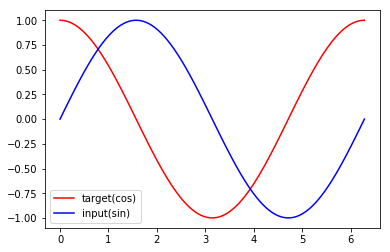

In [148]:
steps=np.linspace(0,np.pi*2,100,dtype=np.float32)
x_np=np.sin(steps)
y_np=np.cos(steps)
plt.plot(steps,y_np,'r-',label='target(cos)')
plt.plot(steps,x_np,'b-',label='input(sin)')
plt.legend(loc='best')

In [159]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn=nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,
            num_layers=1,
            batch_first=True
        )
        self.out=nn.Linear(32,1)
    def forward(self,x,h_state):
        r_out,h_state=self.rnn(x,h_state)
        outs=[]
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs,dim=1),h_state

In [160]:
rnn=RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [161]:
optimizer=torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func=nn.MSELoss()

In [164]:
%matplotlib inline
plt.figure(1, figsize=(12, 5))
plt.ion()

<Figure size 864x360 with 0 Axes>

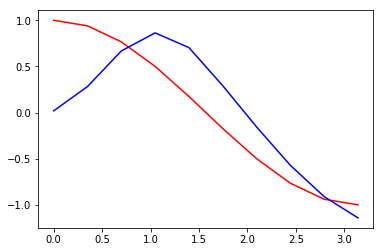

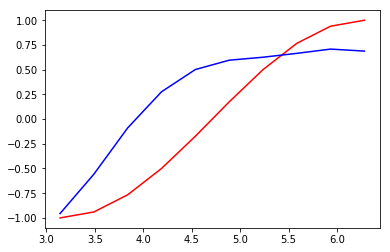

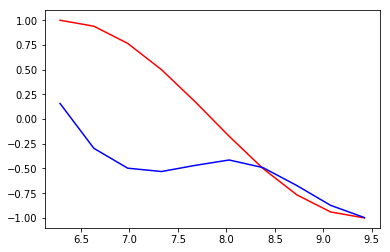

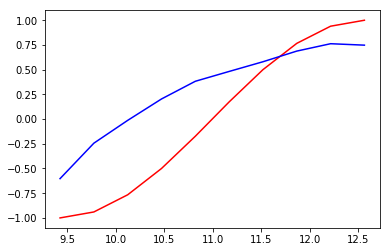

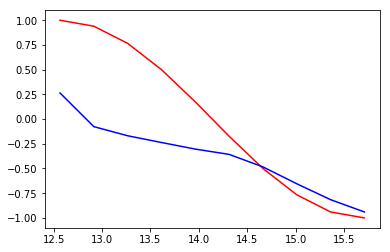

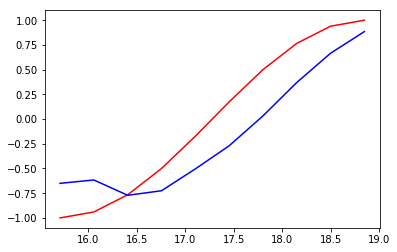

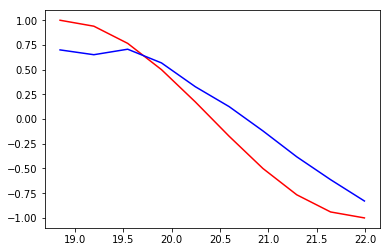

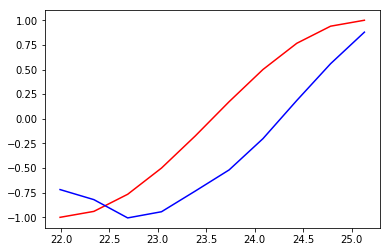

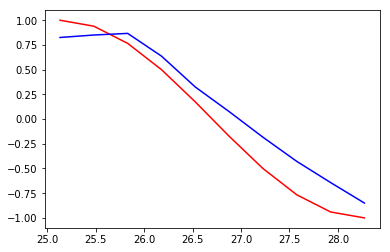

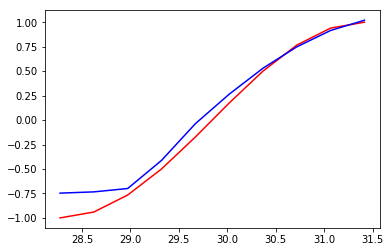

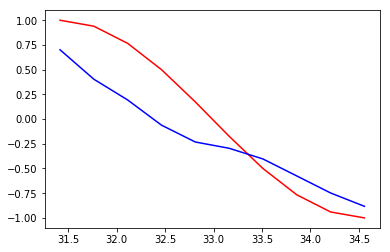

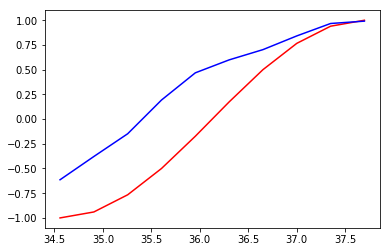

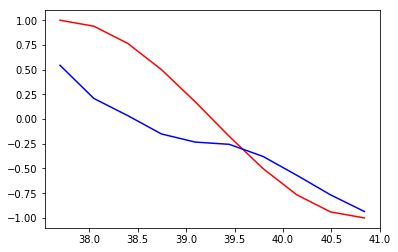

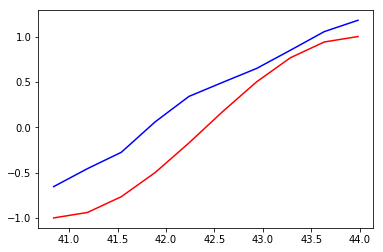

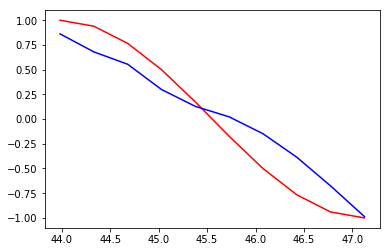

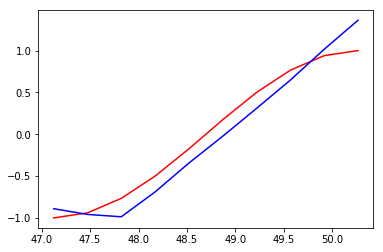

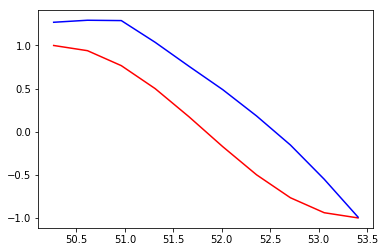

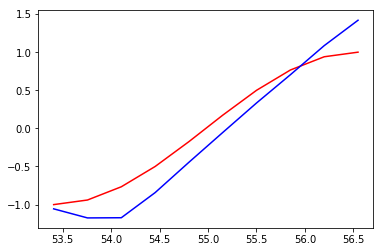

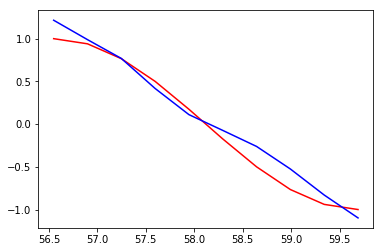

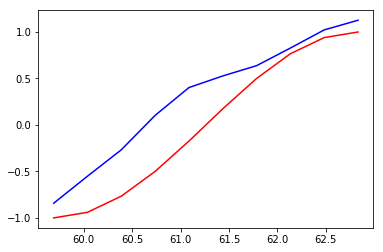

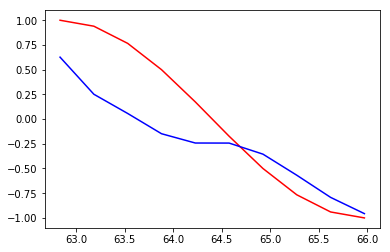

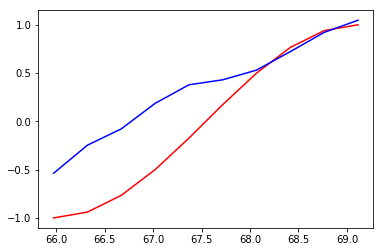

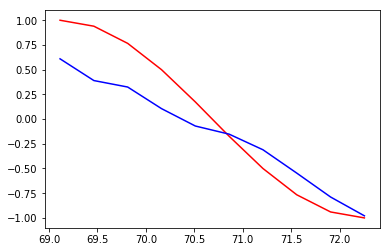

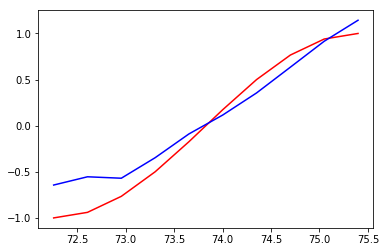

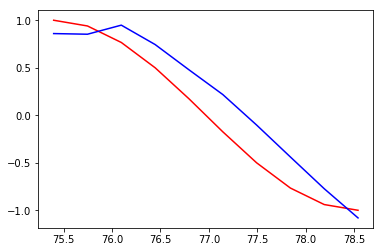

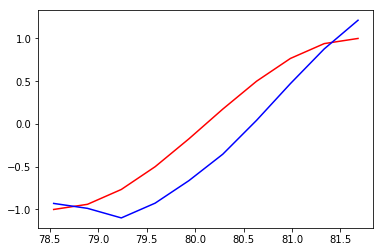

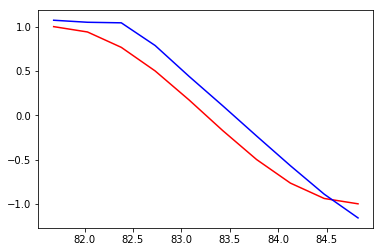

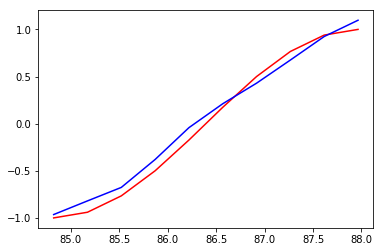

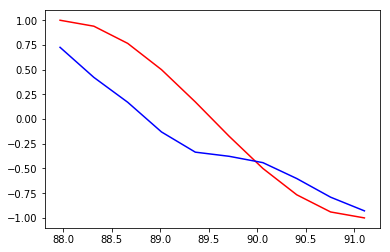

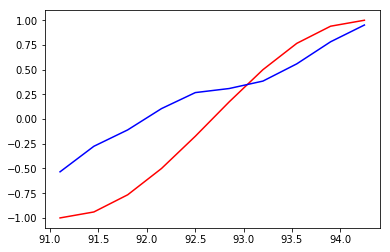

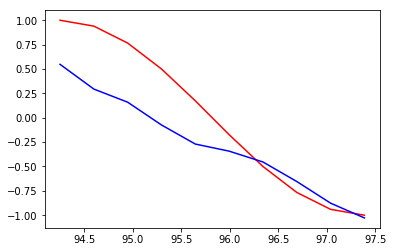

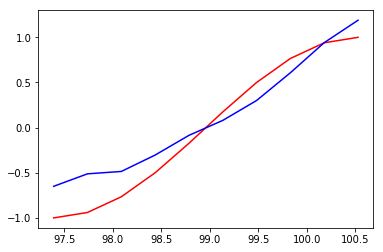

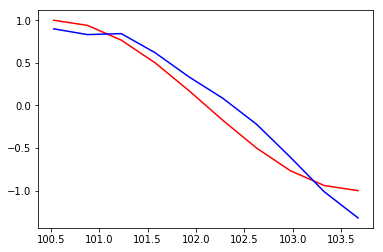

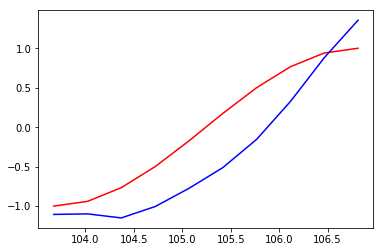

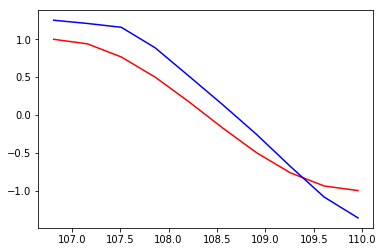

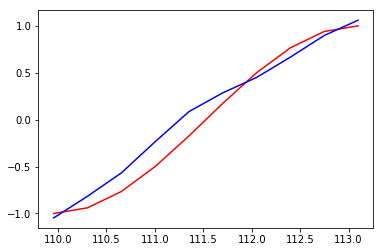

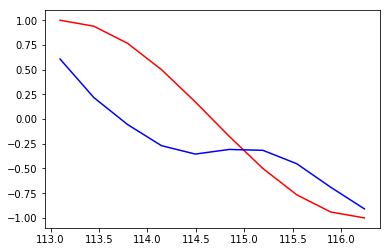

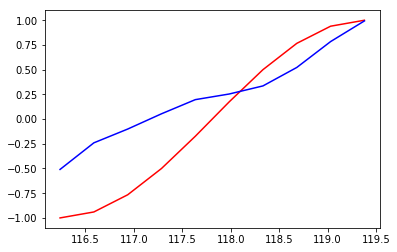

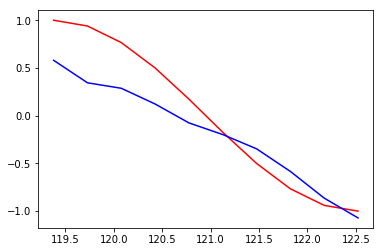

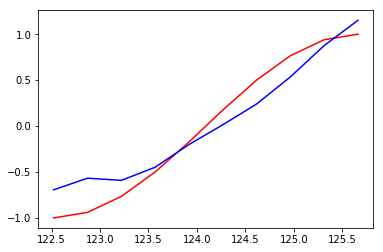

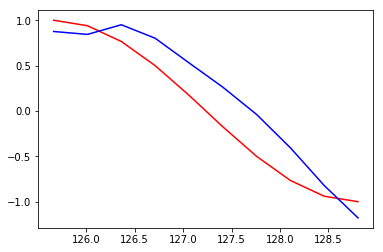

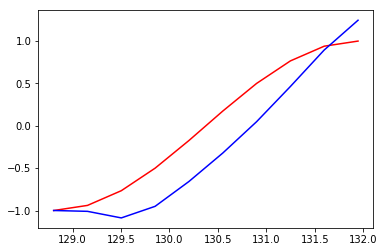

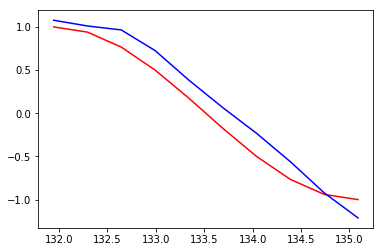

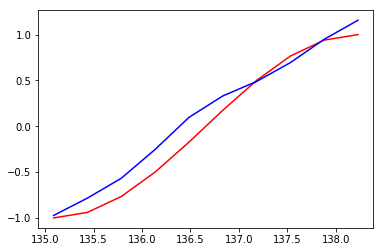

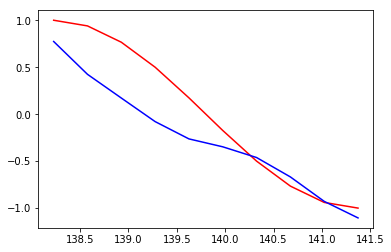

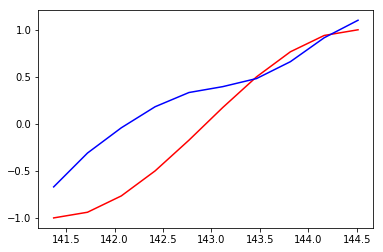

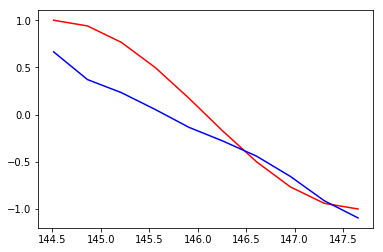

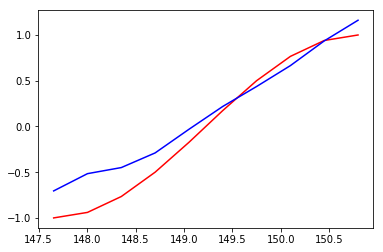

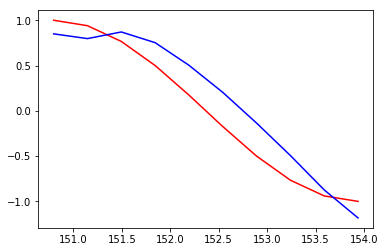

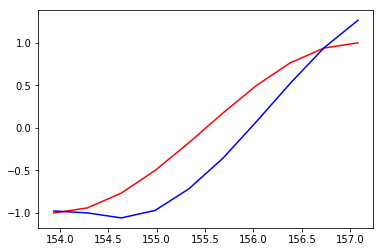

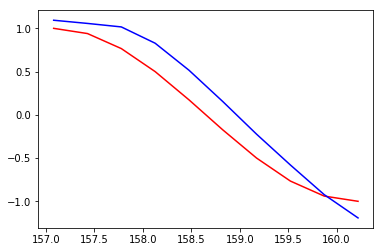

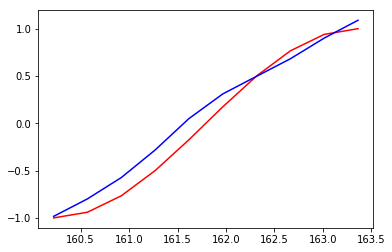

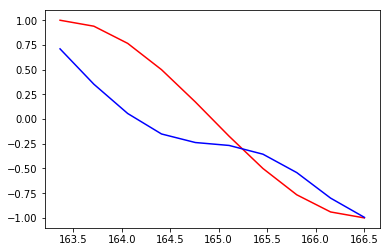

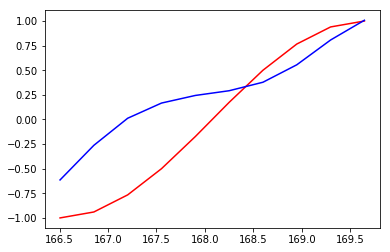

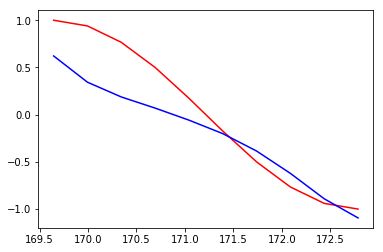

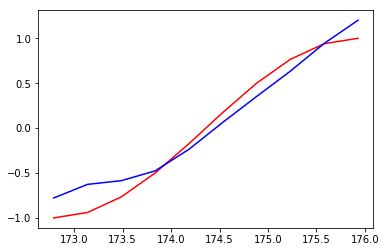

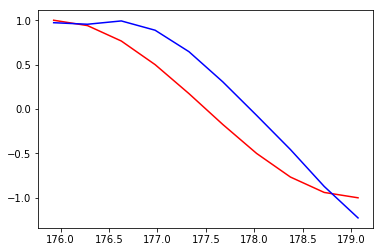

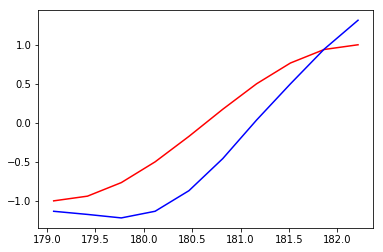

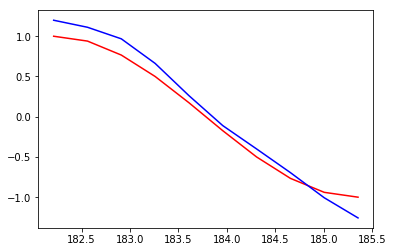

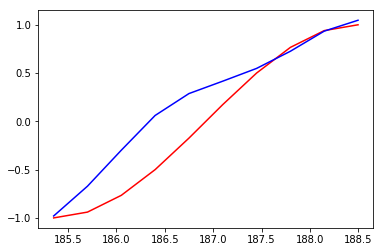

In [165]:
h_state=None
for step in range(60):
    start,end=step*np.pi,(step+1)*np.pi
    steps=np.linspace(start,end,TIME_STEP,dtype=np.float32)
    x_np=np.sin(steps)
    y_np=np.cos(steps)
    
    x=Variable(torch.from_numpy(x_np[np.newaxis,:,np.newaxis]))
    y=Variable(torch.from_numpy(y_np[np.newaxis,:,np.newaxis]))
    
    prediction,h_state=rnn(x,h_state)
    h_state=Variable(h_state.data)
    
    loss=loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

## 自编码

In [167]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from matplotlib import  cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [168]:
torch.manual_seed(1)

In [175]:
EPOCH=10
BATCH_SIZE=64
LR=0.005
DOWNLOAD_MNIST=False
N_TEST_IMG=5

In [170]:
train_data=torchvision.datasets.MNIST(root='./mnist/',
                                      train=True,
                                      transform=torchvision.transforms.ToTensor(),
                                      download=DOWNLOAD_MNIST)

torch.Size([60000, 28, 28])
torch.Size([60000])


Text(0.5,1,'4')

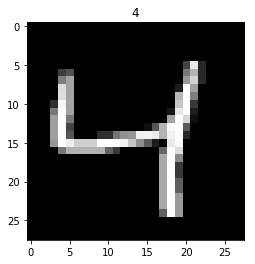

In [171]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[2].numpy(),cmap='gray')
plt.title('%i'%train_data.train_labels[2])

In [172]:
train_loader=Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)

In [178]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder=nn.Sequential(
            nn.Linear(28*28,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12,3),
        )
        self.decoder=nn.Sequential(
            nn.Linear(3,12),
            nn.Tanh(),
            nn.Linear(12,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
    def forward(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return encoded,decoded

In [179]:
autoencoder=AutoEncoder()
optimizer=torch.optim.Adam(autoencoder.parameters(),lr=LR)
loss_func=nn.MSELoss()

view_data=Variable(train_data.train_data[:N_TEST_IMG].view(-1,28*28).type(torch.FloatTensor)/255.)

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


Epoch: 0 |train loss:0.2305


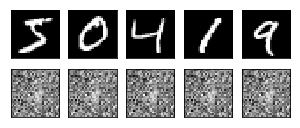

Epoch: 0 |train loss:0.0694


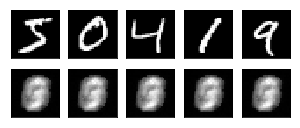

Epoch: 0 |train loss:0.0630


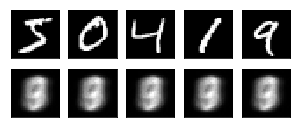

Epoch: 0 |train loss:0.0638


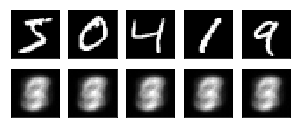

Epoch: 0 |train loss:0.0630


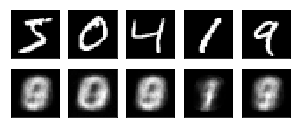

Epoch: 0 |train loss:0.0554


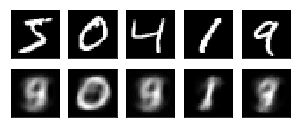

Epoch: 0 |train loss:0.0547


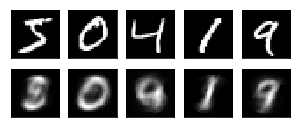

Epoch: 0 |train loss:0.0556


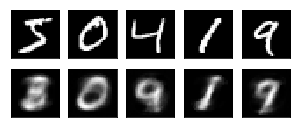

Epoch: 0 |train loss:0.0525


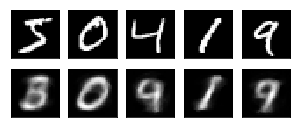

Epoch: 0 |train loss:0.0547


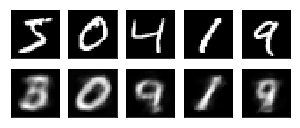

Epoch: 1 |train loss:0.0472


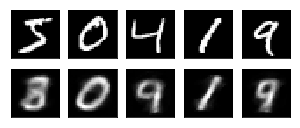

Epoch: 1 |train loss:0.0483


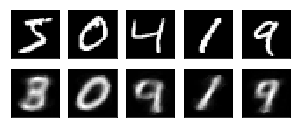

Epoch: 1 |train loss:0.0463


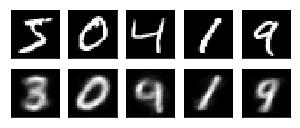

Epoch: 1 |train loss:0.0476


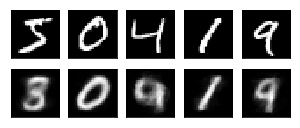

Epoch: 1 |train loss:0.0429


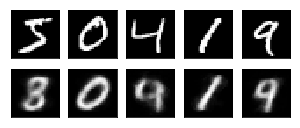

Epoch: 1 |train loss:0.0450


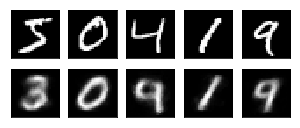

Epoch: 1 |train loss:0.0458


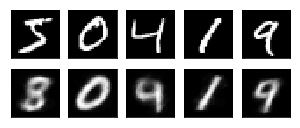

Epoch: 1 |train loss:0.0453


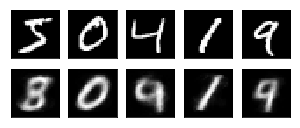

Epoch: 1 |train loss:0.0466


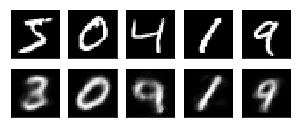

Epoch: 1 |train loss:0.0384


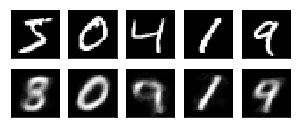

Epoch: 2 |train loss:0.0423


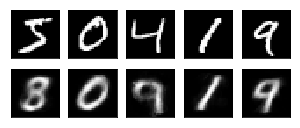

Epoch: 2 |train loss:0.0405


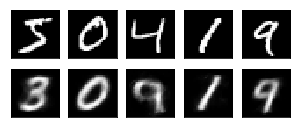

Epoch: 2 |train loss:0.0438


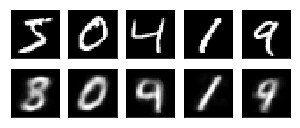

Epoch: 2 |train loss:0.0403


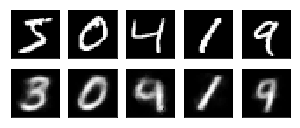

Epoch: 2 |train loss:0.0402


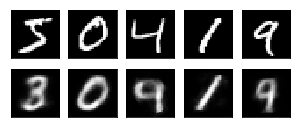

Epoch: 2 |train loss:0.0408


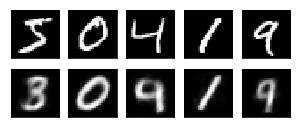

Epoch: 2 |train loss:0.0378


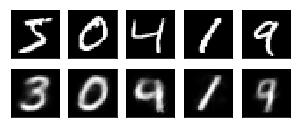

Epoch: 2 |train loss:0.0411


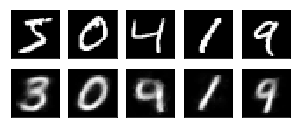

Epoch: 2 |train loss:0.0410


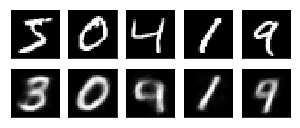

Epoch: 2 |train loss:0.0384


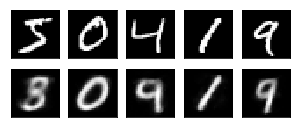

Epoch: 3 |train loss:0.0384


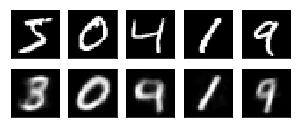

Epoch: 3 |train loss:0.0433


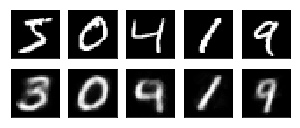

Epoch: 3 |train loss:0.0389


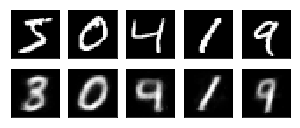

Epoch: 3 |train loss:0.0369


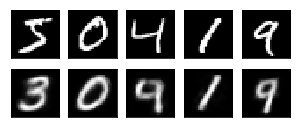

Epoch: 3 |train loss:0.0420


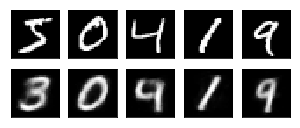

Epoch: 3 |train loss:0.0384


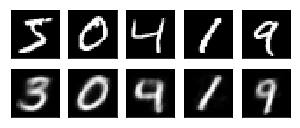

Epoch: 3 |train loss:0.0391


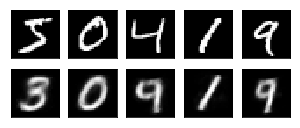

Epoch: 3 |train loss:0.0404


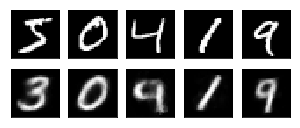

Epoch: 3 |train loss:0.0385


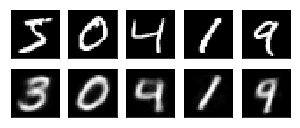

Epoch: 3 |train loss:0.0398


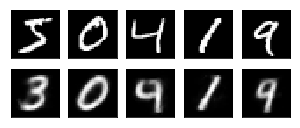

Epoch: 4 |train loss:0.0373


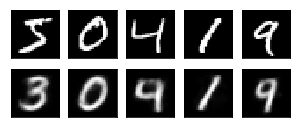

Epoch: 4 |train loss:0.0386


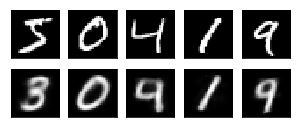

Epoch: 4 |train loss:0.0378


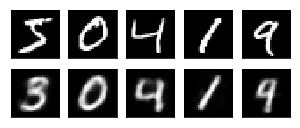

Epoch: 4 |train loss:0.0380


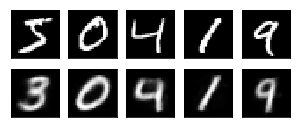

Epoch: 4 |train loss:0.0392


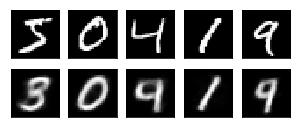

Epoch: 4 |train loss:0.0365


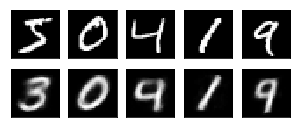

Epoch: 4 |train loss:0.0386


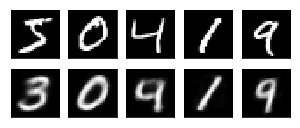

Epoch: 4 |train loss:0.0356


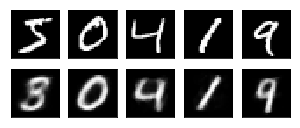

Epoch: 4 |train loss:0.0397


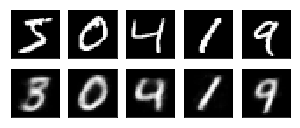

Epoch: 4 |train loss:0.0419


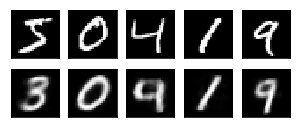

Epoch: 5 |train loss:0.0337


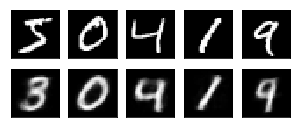

Epoch: 5 |train loss:0.0327


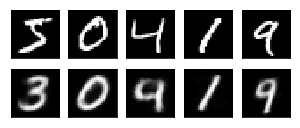

Epoch: 5 |train loss:0.0391


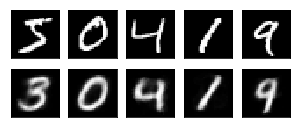

Epoch: 5 |train loss:0.0346


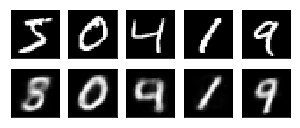

Epoch: 5 |train loss:0.0361


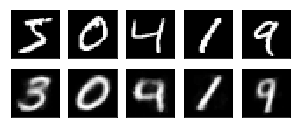

Epoch: 5 |train loss:0.0373


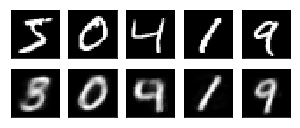

Epoch: 5 |train loss:0.0360


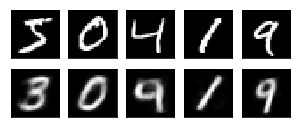

Epoch: 5 |train loss:0.0403


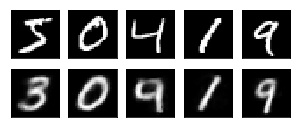

Epoch: 5 |train loss:0.0349


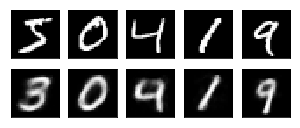

Epoch: 5 |train loss:0.0354


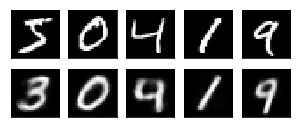

Epoch: 6 |train loss:0.0381


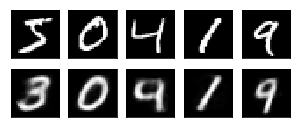

Epoch: 6 |train loss:0.0356


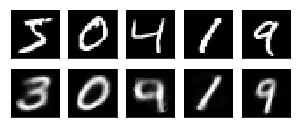

Epoch: 6 |train loss:0.0357


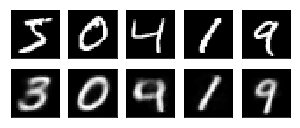

Epoch: 6 |train loss:0.0353


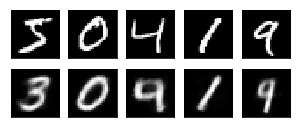

Epoch: 6 |train loss:0.0368


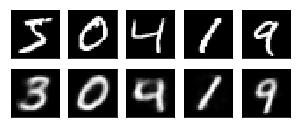

Epoch: 6 |train loss:0.0391


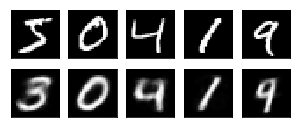

Epoch: 6 |train loss:0.0392


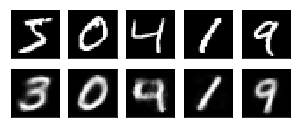

Epoch: 6 |train loss:0.0396


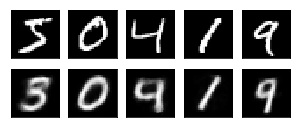

Epoch: 6 |train loss:0.0393


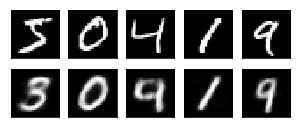

Epoch: 6 |train loss:0.0331


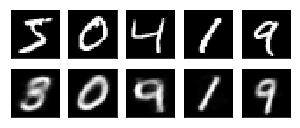

Epoch: 7 |train loss:0.0364


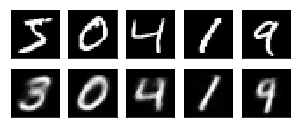

Epoch: 7 |train loss:0.0338


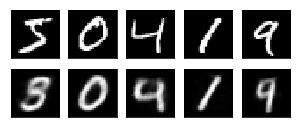

Epoch: 7 |train loss:0.0344


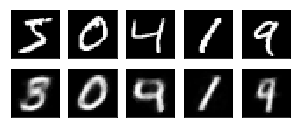

Epoch: 7 |train loss:0.0347


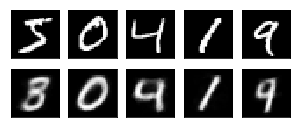

Epoch: 7 |train loss:0.0364


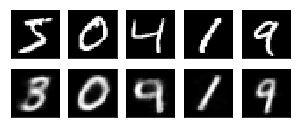

Epoch: 7 |train loss:0.0330


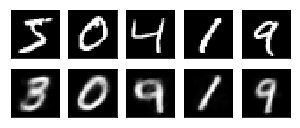

Epoch: 7 |train loss:0.0366


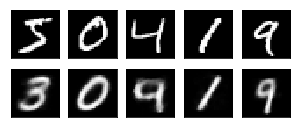

Epoch: 7 |train loss:0.0361


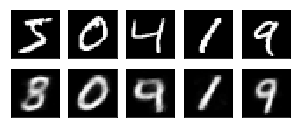

Epoch: 7 |train loss:0.0386


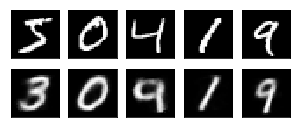

Epoch: 7 |train loss:0.0350


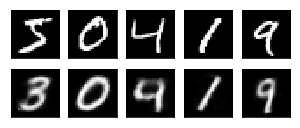

Epoch: 8 |train loss:0.0385


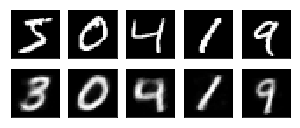

Epoch: 8 |train loss:0.0358


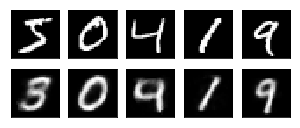

Epoch: 8 |train loss:0.0355


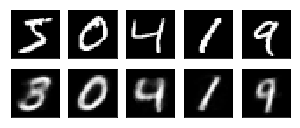

Epoch: 8 |train loss:0.0348


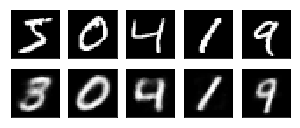

Epoch: 8 |train loss:0.0392


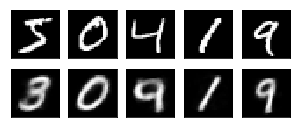

Epoch: 8 |train loss:0.0355


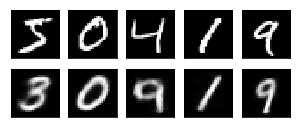

Epoch: 8 |train loss:0.0332


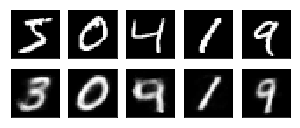

Epoch: 8 |train loss:0.0366


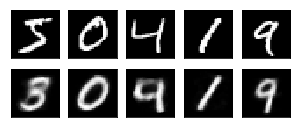

Epoch: 8 |train loss:0.0363


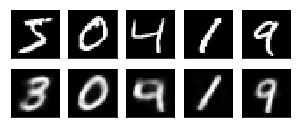

Epoch: 8 |train loss:0.0344


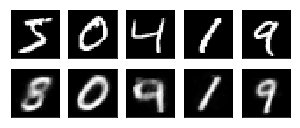

Epoch: 9 |train loss:0.0315


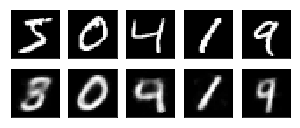

Epoch: 9 |train loss:0.0326


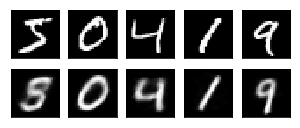

Epoch: 9 |train loss:0.0363


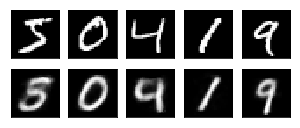

Epoch: 9 |train loss:0.0368


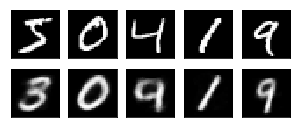

Epoch: 9 |train loss:0.0376


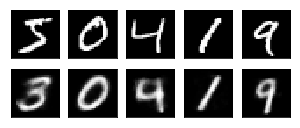

Epoch: 9 |train loss:0.0343


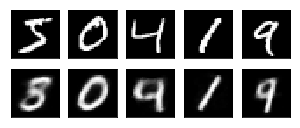

Epoch: 9 |train loss:0.0367


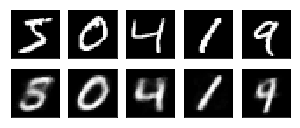

Epoch: 9 |train loss:0.0327


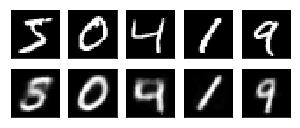

Epoch: 9 |train loss:0.0376


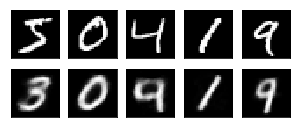

Epoch: 9 |train loss:0.0364


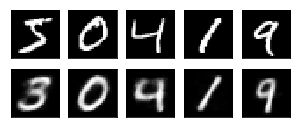

In [180]:
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        b_x=Variable(x.view(-1,28*28))
        b_y=Variable(x.view(-1,28*28))
        b_label=Variable(y)
        
        encoded,decoded=autoencoder(b_x)
        
        loss=loss_func(decoded,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%100==0:
            print('Epoch:',epoch,'|train loss:%.4f'%loss.data[0])
            
            _,decoded_data=autoencoder(view_data)
            f,a=plt.subplots(2,N_TEST_IMG,figsize=(5,2))
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i],(28,28)),cmap='gray')
                a[0][i].set_xticks(())
                a[0][i].set_yticks(())
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i],(28,28)),cmap='gray')
                a[1][i].set_xticks(())
                a[1][i].set_yticks(())
            plt.show()
            plt.pause(0.05)

(-2.3564067, 1.8195804)

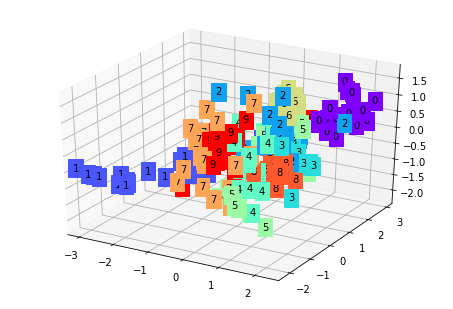

In [181]:
view_data=Variable(train_data.train_data[:200].view(-1,28*28).type(torch.FloatTensor)/255.)
encoded_data,_=autoencoder(view_data)
fig=plt.figure(2)
ax=Axes3D(fig)
X,Y,Z=encoded_data.data[:,0].numpy(),encoded_data.data[:,1].numpy(),encoded_data.data[:,2].numpy()
values=train_data.train_labels[:200].numpy()
for x,y,z,s in zip(X,Y,Z,values):
    c=cm.rainbow(int(255*s/9))
    ax.text(x,y,z,s,backgroundcolor=c)
ax.set_xlim(X.min(),X.max())
ax.set_ylim(Y.min(),Y.max())
ax.set_zlim(Z.min(),Z.max())

## DQN

In [1]:
import torch
import torch.nn as nn
from torch.autograd import  Variable
import torch.nn.functional as F
import numpy as np
import gym

In [2]:
BATCH_SIZE=32
LR=0.01
EPSILON=0.9
GAMMA=0.9
TARGET_REPLACE_ITER=100
MEMORY_CAPACITY=2000
env=gym.make('CartPole-v0')
env=env.unwrapped
N_ACTIONS=env.action_space.n
N_STATES=env.observation_space.shape[0]

In [3]:
class Net(nn.Module):
    def __init__(self,):
        super(Net,self).__init__()
        self.fc1=nn.Linear(N_STATES,10)
        self.fc1.weight.data.normal_(0,0.1)
        self.out=nn.Linear(10,N_ACTIONS)
        self.out.weight.data.normal_(0,0.1)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(x)
        actions_value=self.out(x)
        return actions_value

In [13]:
class DQN(object):
    def __init__(self):
        self.eval_net,self.target_net=Net(),Net()
        
        self.learn_step_counter=0
        self.memory_counter=0
        self.memory=np.zeros((MEMORY_CAPACITY,N_STATES*2+2))
        self.optimizer=torch.optim.Adam(self.eval_net.parameters(),lr=LR)
        self.loss_func=nn.MSELoss()
    def choose_action(self,x):
        x=Variable(torch.unsqueeze(torch.FloatTensor(x),0))
        if np.random.uniform()<EPSILON:
            actions_value=self.eval_net.forward(x)
            action=torch.max(actions_value,1)[1].data.numpy()[0]
        else:
            action=np.random.randint(0,N_ACTIONS)
        return action
    def store_transiton(self,s,a,r,s_):
        transiton=np.hstack((s,[a,r],s_))
        index=self.memory_counter%MEMORY_CAPACITY
        self.memory[index,:]=transiton
        self.memory_counter+=1
    def learn(self):
        if self.learn_step_counter% TARGET_REPLACE_ITER==0:
            self.target_net.load_state_dict(self.eval_net.state_dict())
        sample_index=np.random.choice(MEMORY_CAPACITY,BATCH_SIZE)
        b_memory=self.memory[sample_index,:]
        b_s=Variable(torch.FloatTensor(b_memory[:,:N_STATES]))
        b_a=Variable(torch.LongTensor(b_memory[:,N_STATES:N_STATES+1].astype(int)))
        b_r=Variable(torch.FloatTensor(b_memory[:,N_STATES+1:N_STATES+2]))
        b_s_=Variable(torch.FloatTensor(b_memory[:,-N_STATES:]))
        
        q_eval=self.eval_net(b_s).gather(1,b_a)
        q_next=self.target_net(b_s_).detach()
        q_target=b_r+GAMMA* q_next.max(1)[0]
        loss=self.loss_func(q_eval,q_target)
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

In [14]:
dqn=DQN()
print(dqn)

In [15]:
print('\nCollecting experience....')
for i_episode in range(400):
    s=env.reset()
    ep_r=0
    while True:
        env.render()
        a=dqn.choose_action(s)
       
        s_,r,done,info=env.step(a)
        
        x,x_dot,theta,theta_dot=s_
        r1=(env.x_threshold-abs(x))/env.x_threshold-0.8
        r2=(env.theta_threshold_radians-abs(theta))/env.theta_threshold_radians-0.5
        r=r1+r2
        
        dqn.store_transiton(s,a,r,s_)
        
        ep_r+=r
        if dqn.memory_counter>MEMORY_CAPACITY:
            dqn.learn()
            if done:
                print('Ep:',i_episode,'|Ep_r:',round(ep_r,2))
        if done:
            break
        s=s_

TypeError: can't multiply sequence by non-int of type 'float'

## GAN

In [16]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1)
np.random.seed(1)

In [17]:
BATCH_SIZE=64
LR_G=0.0001
LR_D=0.0001
N_IDEAS=5
ART_COMPONENTS=15
PAINT_POINTS=np.vstack([np.linspace(-1,1,ART_COMPONENTS) for _ in range(BATCH_SIZE)])

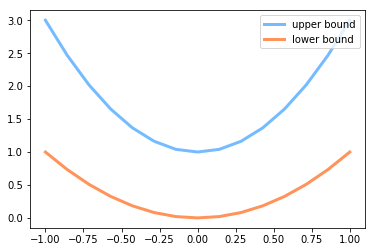

In [20]:
plt.plot(PAINT_POINTS[0],2*np.power(PAINT_POINTS[0],2)+1,c='#74BCFF',lw=3,label='upper bound')
plt.plot(PAINT_POINTS[0],1*np.power(PAINT_POINTS[0],2)+0,c='#FF9359',lw=3,label='lower bound')
plt.legend(loc='upper right')

In [21]:
def artist_works():
    a=np.random.uniform(1,2,size=BATCH_SIZE)[:,np.newaxis]
    paintings=a*np.power(PAINT_POINTS,2)+(a-1)
    paintings=torch.from_numpy(paintings).float()
    return Variable(paintings)

In [22]:
G=nn.Sequential(
    nn.Linear(N_IDEAS,128),
    nn.ReLU(),
    nn.Linear(128,ART_COMPONENTS),
)

In [23]:
D=nn.Sequential(
    nn.Linear(ART_COMPONENTS,128),
    nn.ReLU(),
    nn.Linear(128,1),
    nn.Sigmoid(),
)

In [24]:
opt_D=torch.optim.Adam(D.parameters(),lr=LR_D)
opt_G=torch.optim.Adam(G.parameters(),lr=LR_G)

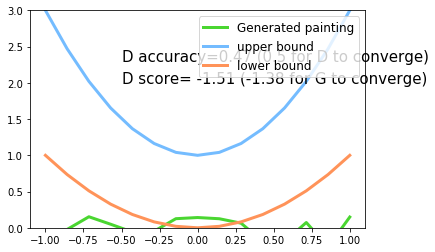

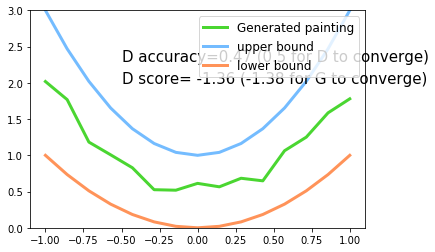

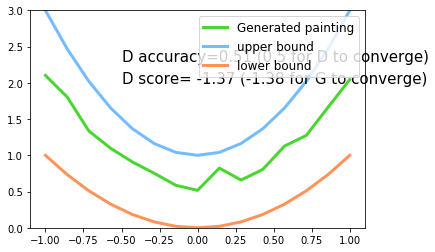

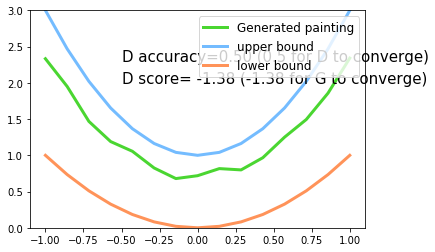

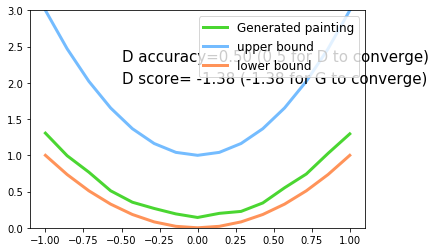

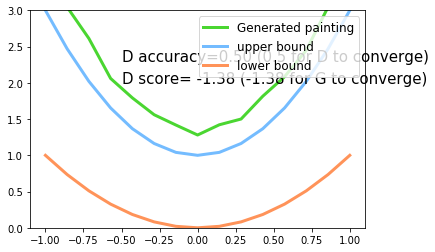

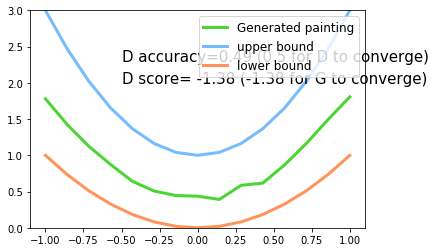

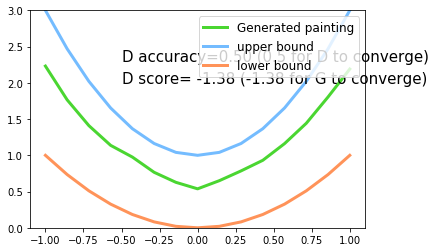

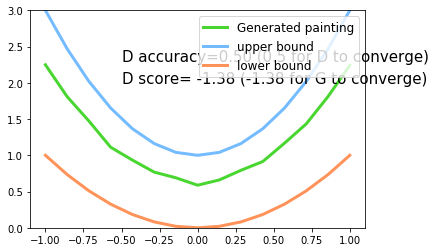

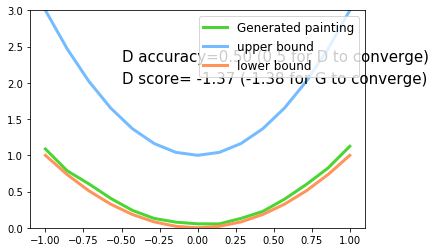

In [25]:
for step in range(10000):
    artist_paintings=artist_works()
    G_ideas=Variable(torch.randn(BATCH_SIZE,N_IDEAS))
    G_paintings=G(G_ideas)
    
    prob_artist0=D(artist_paintings)
    prob_artist1=D(G_paintings)
    
    D_loss=-torch.mean(torch.log(prob_artist0)+torch.log(1-prob_artist1))
    G_loss=torch.mean(torch.log(1-prob_artist1))
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)
    opt_D.step()
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    if step % 1000 == 0:  # plotting
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 15})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 15})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=12);plt.draw();plt.pause(0.01)
        plt.show()

## 动态

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

# Hyper Parameters
INPUT_SIZE = 1          # rnn input size / image width
LR = 0.02  

In [2]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []                                   # this is where you can find torch is dynamic
        for time_step in range(r_out.size(1)):      # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state


In [3]:
rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


10


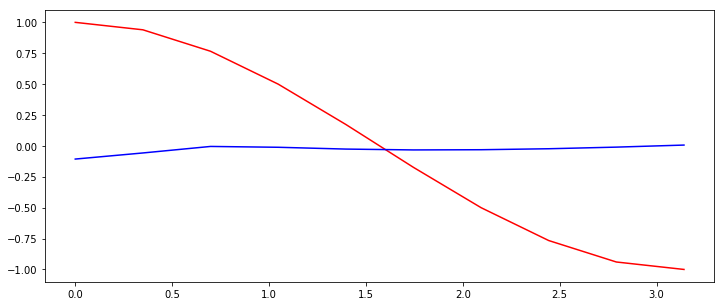

30


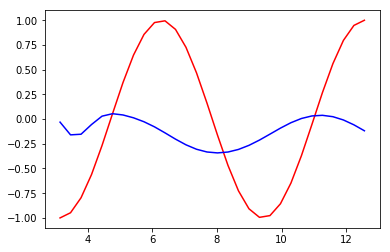

10


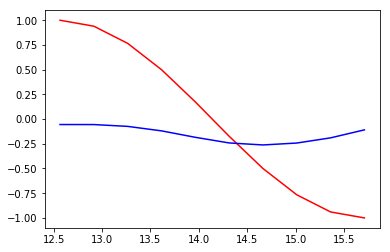

10


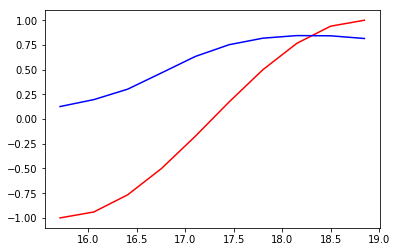

10


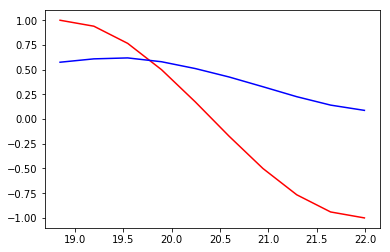

30


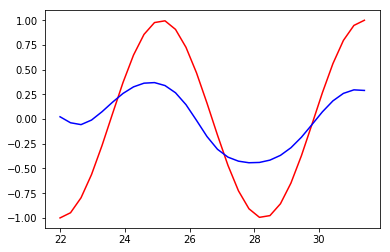

10


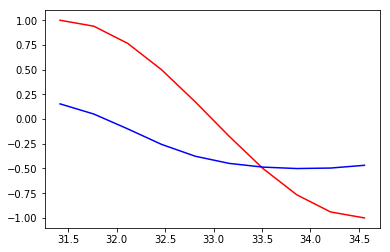

10


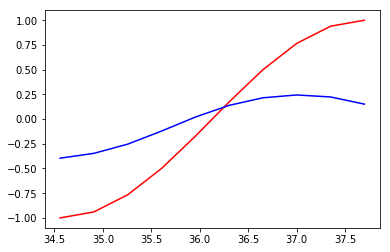

30


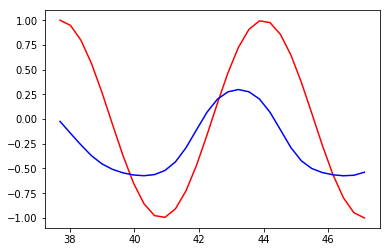

20


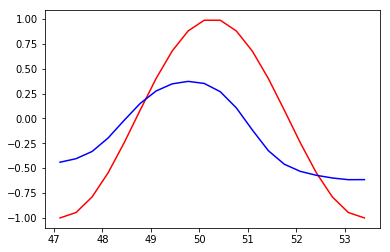

20


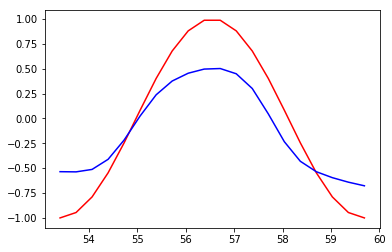

10


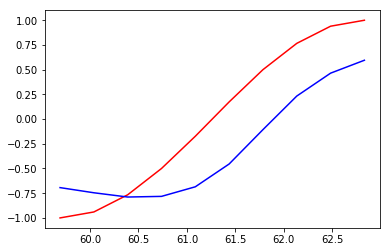

10


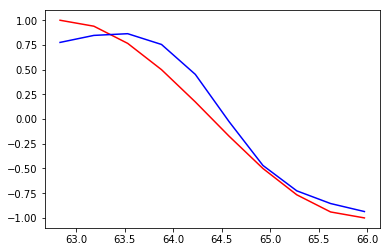

30


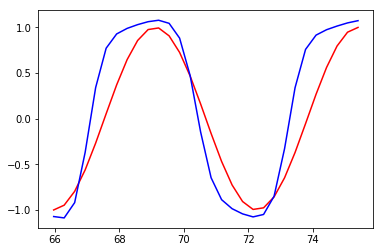

30


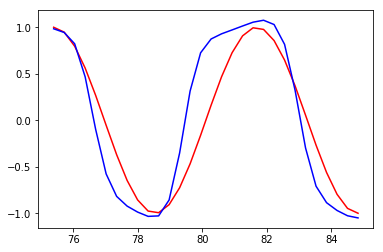

20


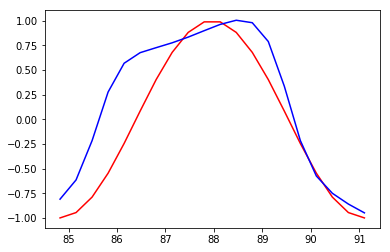

20


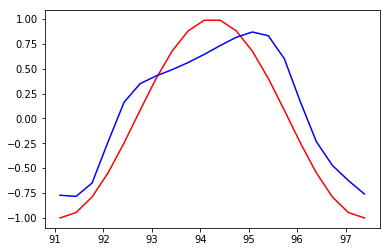

30


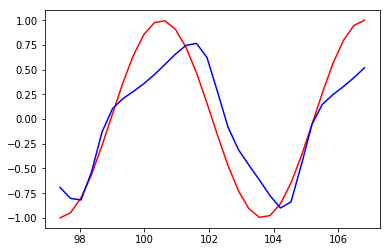

10


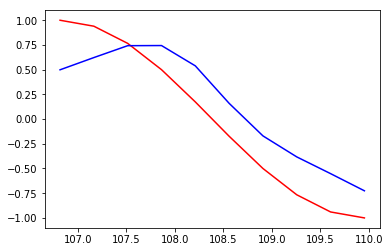

30


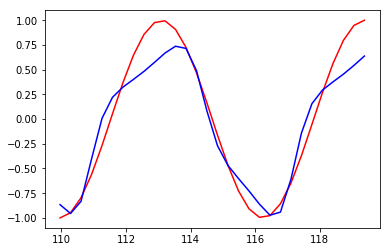

30


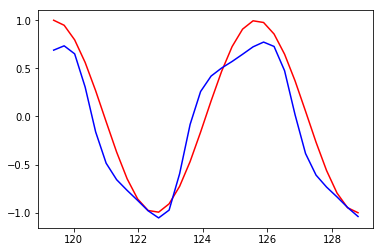

10


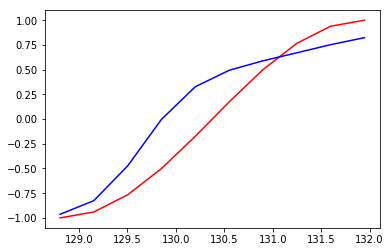

30


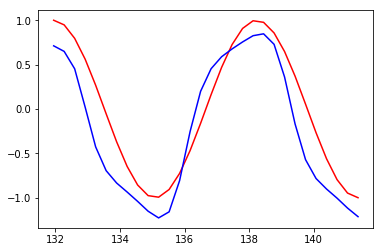

10


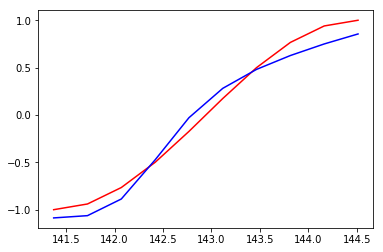

20


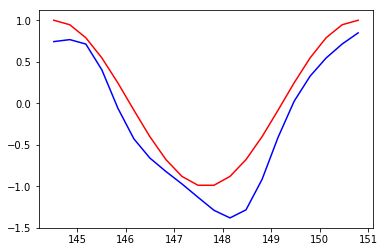

30


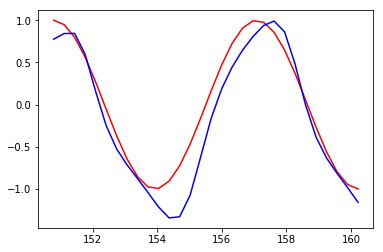

30


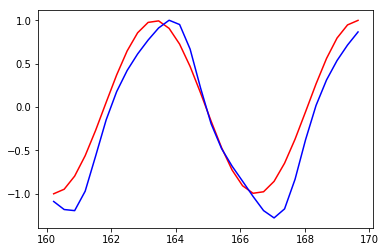

30


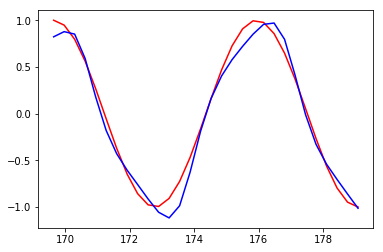

30


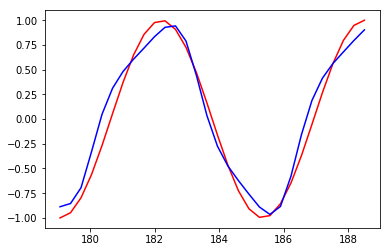

20


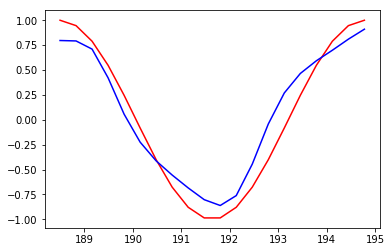

20


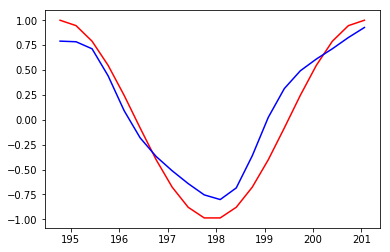

20


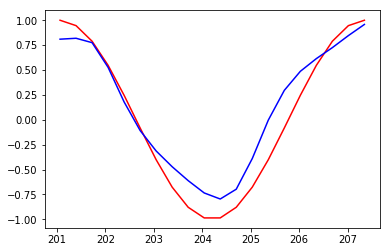

30


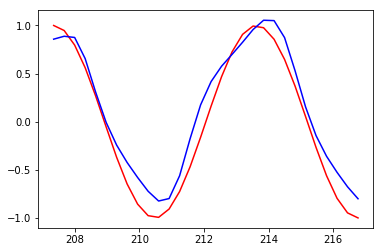

20


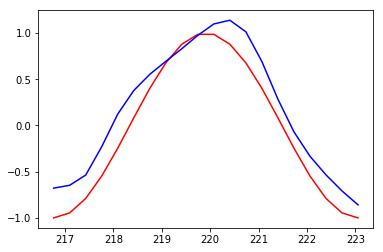

10


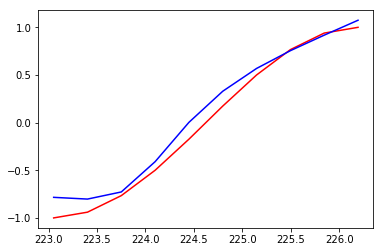

20


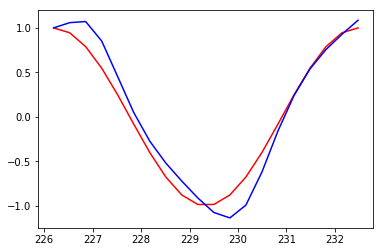

30


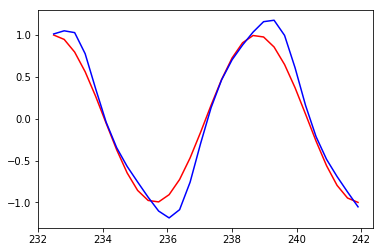

30


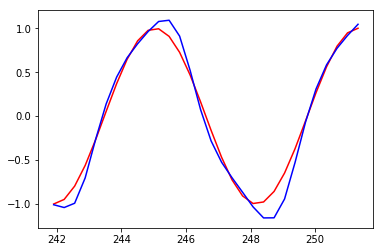

30


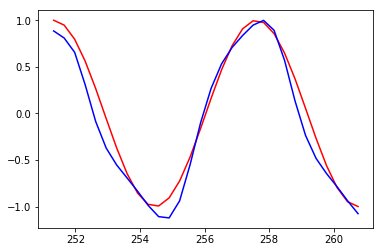

30


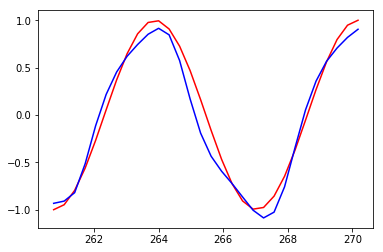

20


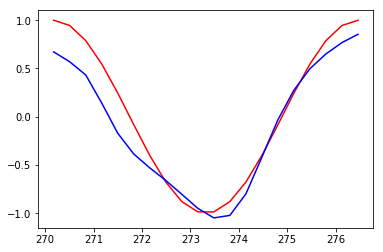

30


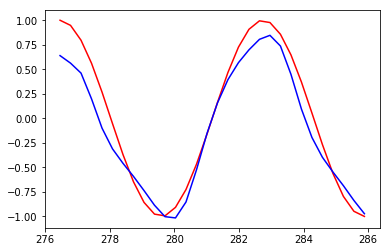

10


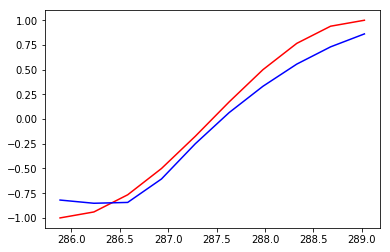

30


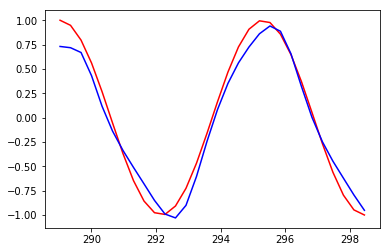

30


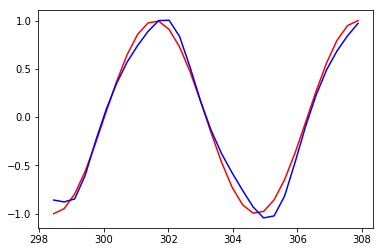

30


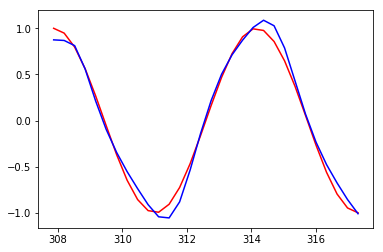

20


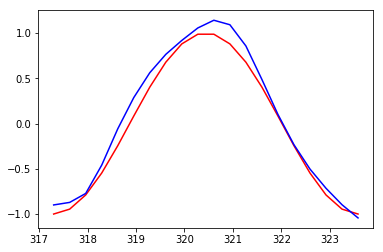

20


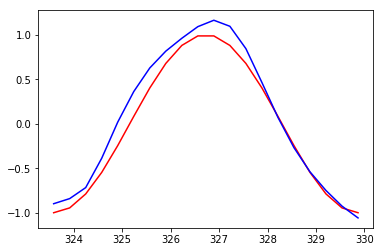

20


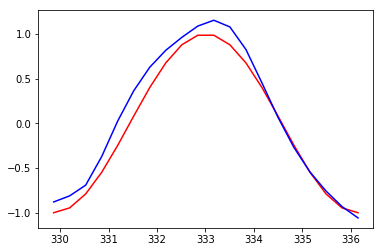

20


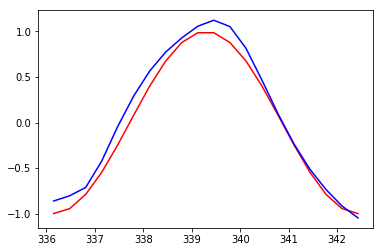

10


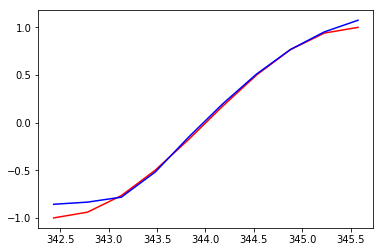

10


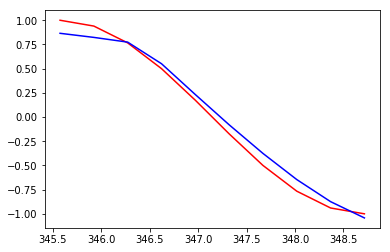

20


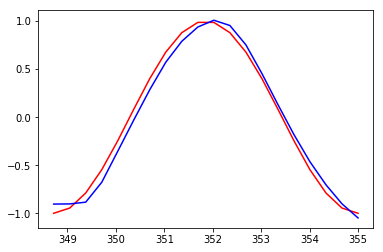

30


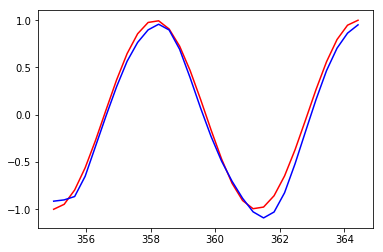

20


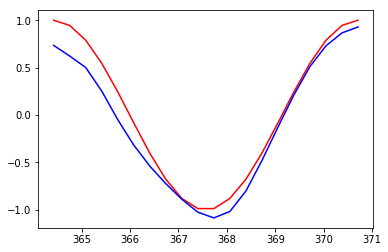

10


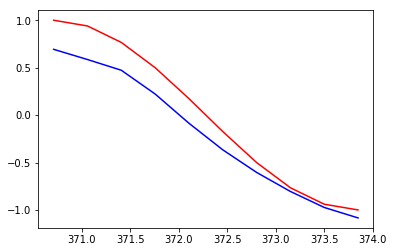

10


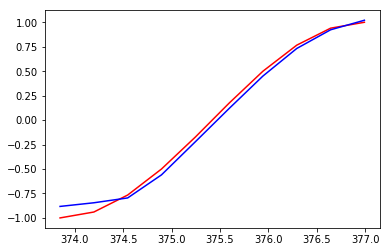

10


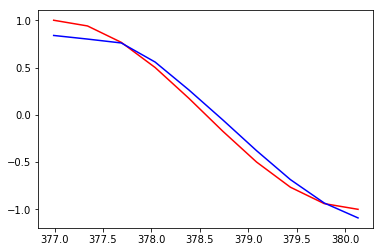

20


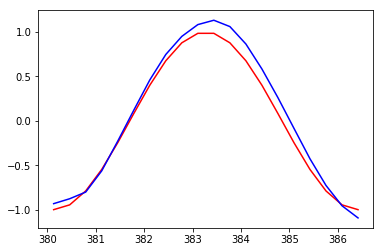

10


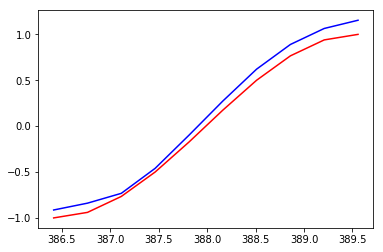

In [4]:
h_state = None   # for initial hidden state

plt.figure(1, figsize=(12, 5))
plt.ion()   # continuously plot

########################  Below is different #########################

################ static time steps ##########
# for step in range(60):
#     start, end = step * np.pi, (step+1)*np.pi   # time steps
#     # use sin predicts cos
#     steps = np.linspace(start, end, 10, dtype=np.float32)

################ dynamic time steps #########
step = 0
for i in range(60):
    dynamic_steps = np.random.randint(1, 4)  # has random time steps
    start, end = step * np.pi, (step + dynamic_steps) * np.pi  # different time steps length
    step += dynamic_steps

    # use sin predicts cos
    steps = np.linspace(start, end, 10 * dynamic_steps, dtype=np.float32)

#######################  Above is different ###########################

    print(len(steps))       # print how many time step feed to RNN

    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = Variable(h_state.data)        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    plt.pause(0.05)

plt.ioff()
plt.show()

## 过拟合

In [5]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
torch.manual_seed(1)

In [10]:
N_SAMPLES=20
N_HIDDEN=100

In [7]:
x=torch.unsqueeze(torch.linspace(-1,1,N_SAMPLES),1)
y=x+0.3*torch.normal(torch.zeros(N_SAMPLES,1),torch.ones(N_SAMPLES,1))
x,y=Variable(x),Variable(y)

In [8]:
test_x=torch.unsqueeze(torch.linspace(-1,1,N_SAMPLES),1)
test_y=test_x+0.3*torch.normal(torch.zeros(N_SAMPLES,1),torch.ones(N_SAMPLES,1))
test_x,test_y=Variable(test_x,volatile=True),Variable(test_y,volatile=True)

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(-2.5, 2.5)

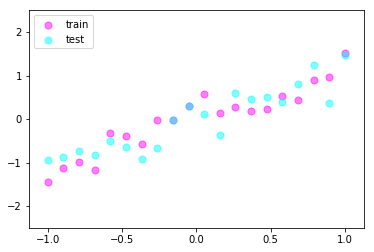

In [9]:
plt.scatter(x.data.numpy(),y.data.numpy(),c='magenta',s=50,alpha=0.5,label='train')
plt.scatter(test_x.data.numpy(),test_y.data.numpy(),c='cyan',s=50,alpha=0.5,label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5,2.5))

In [11]:
net_overfitting=torch.nn.Sequential(
    torch.nn.Linear(1,N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,1)
)

net_dropped=torch.nn.Sequential(
    torch.nn.Linear(1,N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,N_HIDDEN),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,1)
)

In [12]:
optimizer_ofit=torch.optim.Adam(net_overfitting.parameters(),lr=0.01)
optimizer_drop=torch.optim.Adam(net_dropped.parameters(),lr=0.01)

loss_func=torch.nn.MSELoss()

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


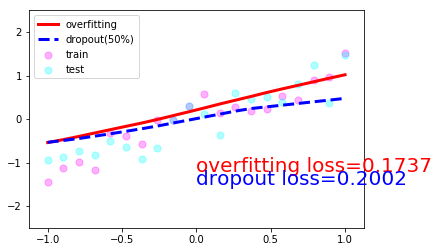

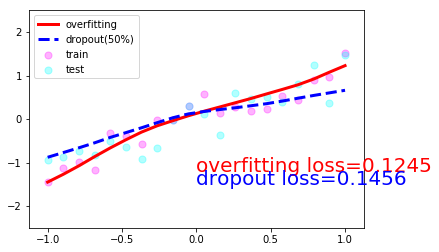

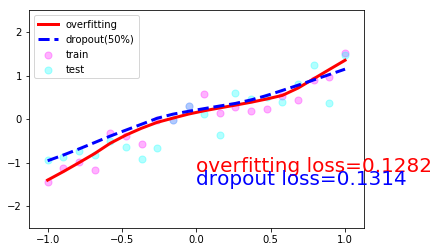

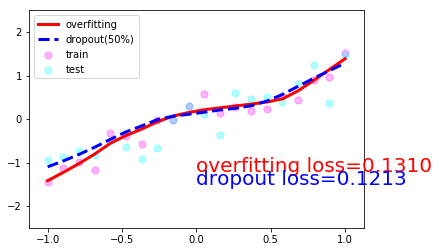

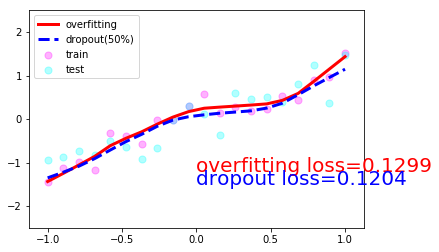

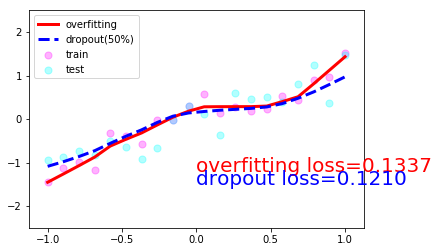

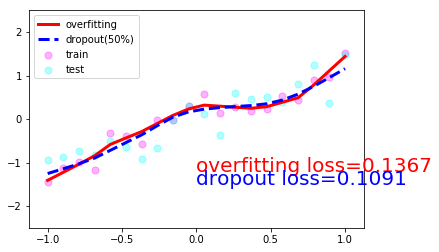

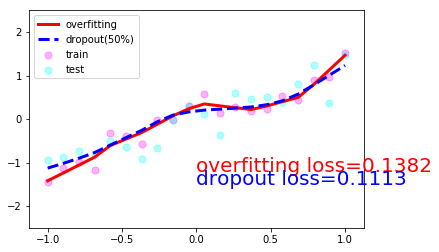

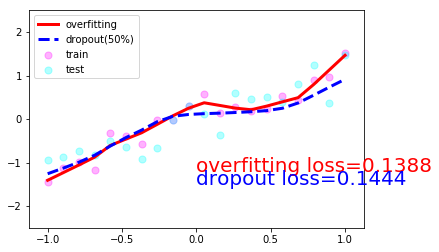

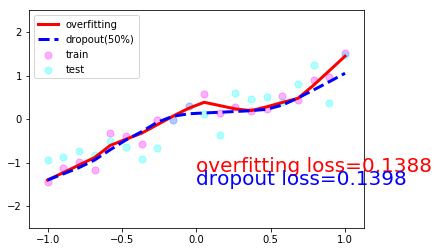

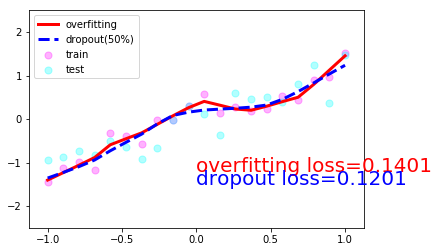

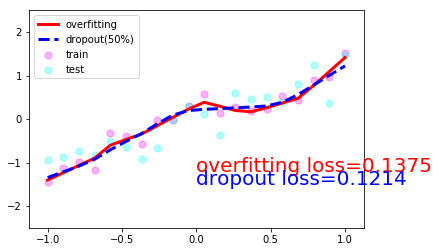

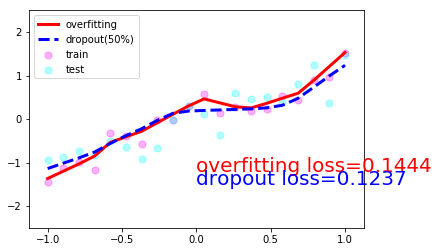

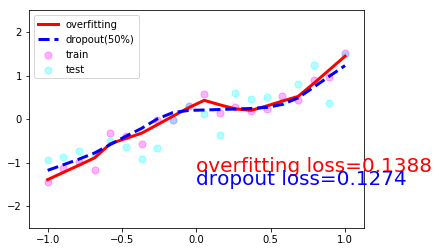

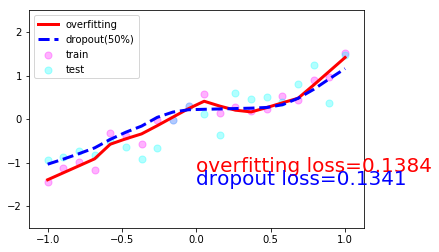

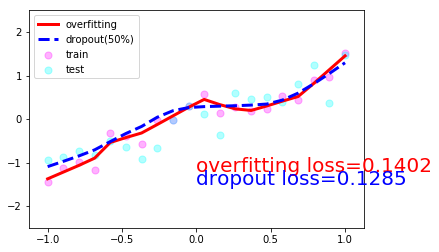

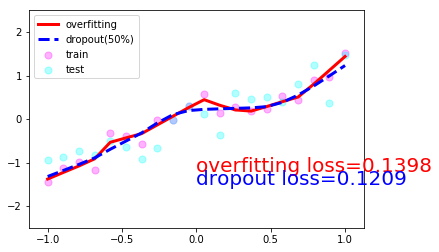

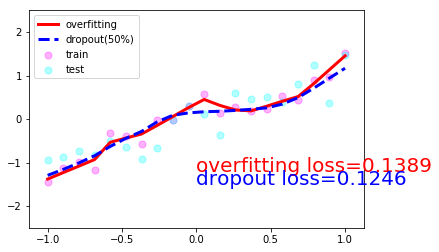

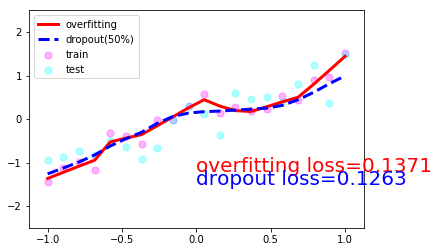

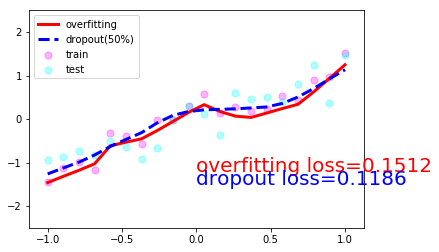

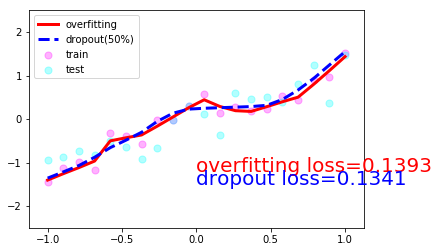

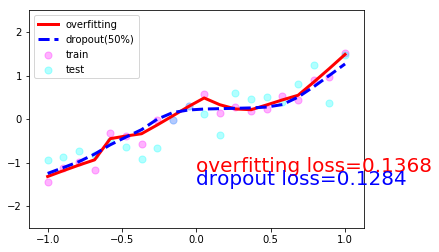

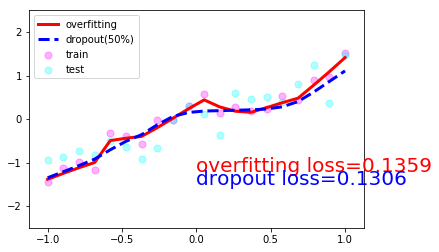

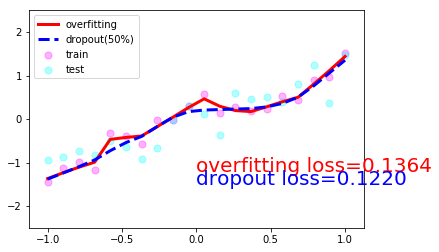

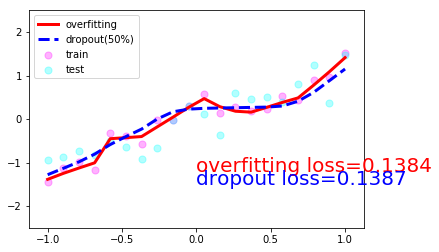

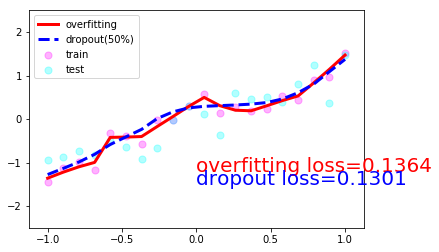

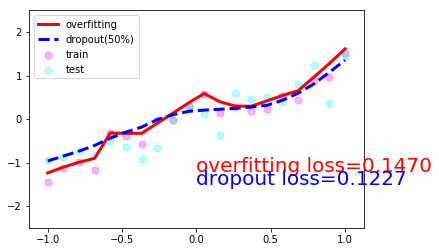

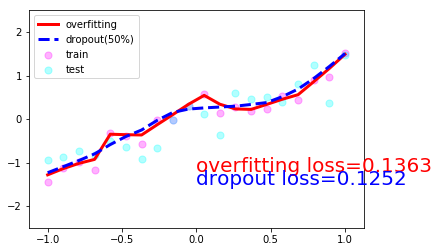

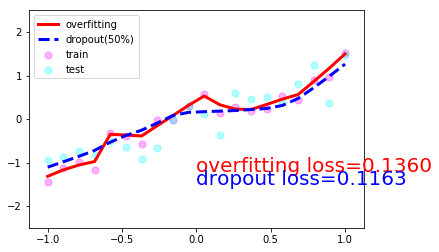

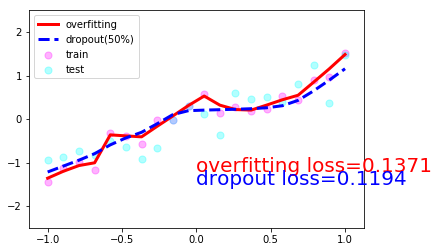

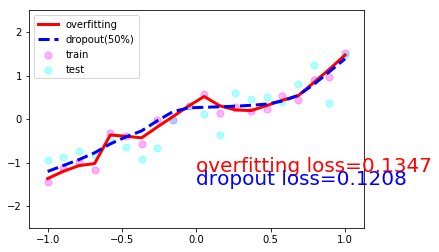

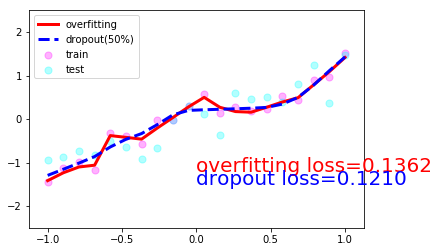

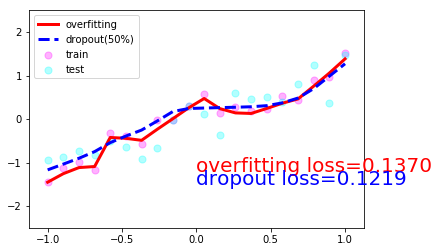

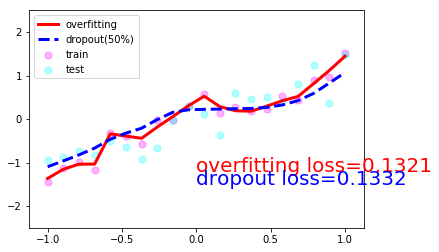

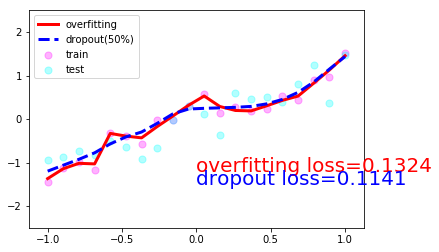

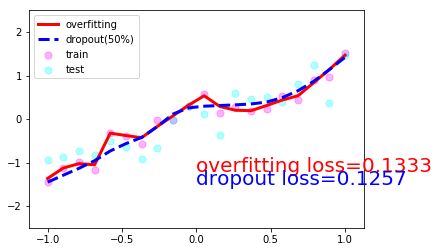

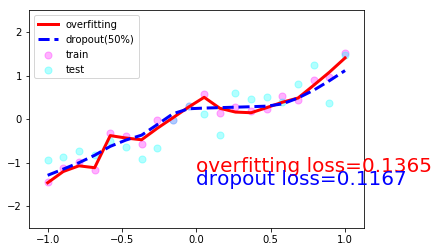

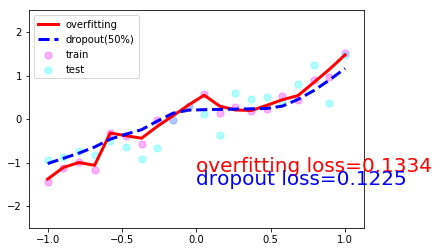

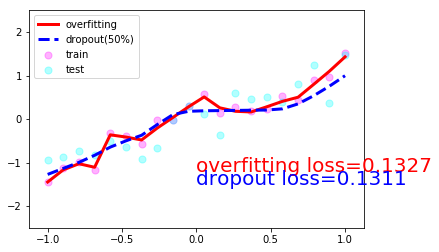

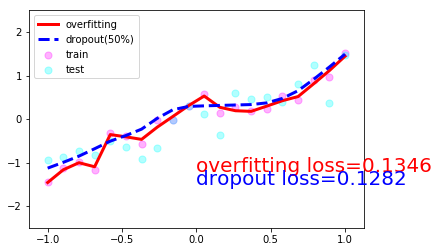

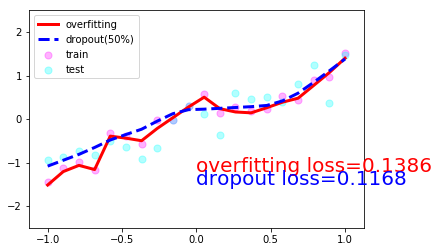

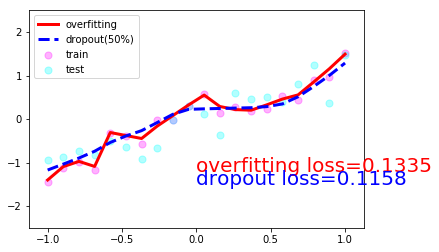

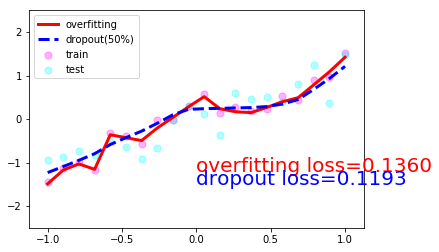

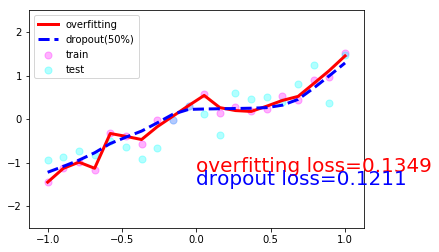

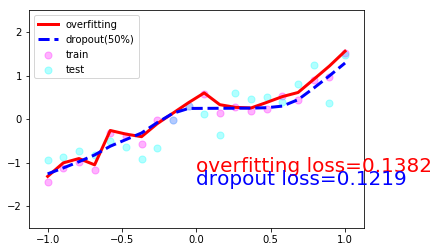

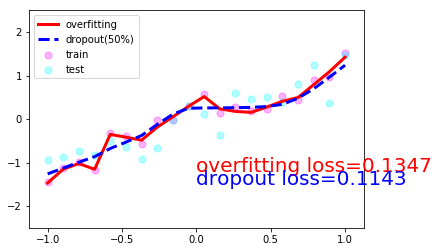

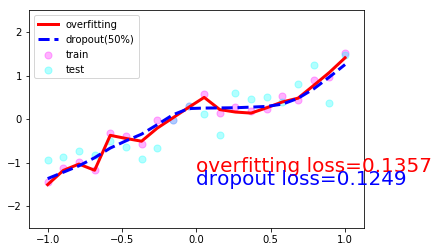

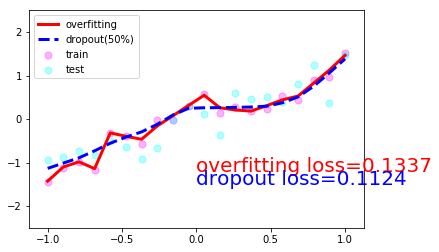

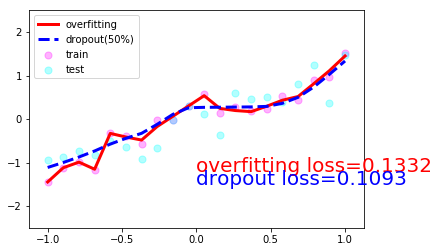

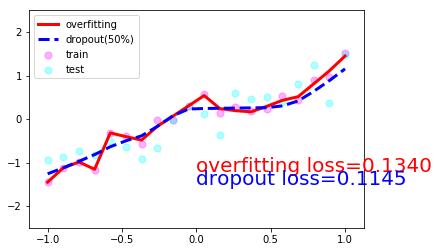

In [13]:
for t in range(500):
    pred_ofit=net_overfitting(x)
    pred_drop=net_dropped(x)
    loss_ofit=loss_func(pred_ofit,y)
    loss_drop=loss_func(pred_drop,y)
    
    optimizer_ofit.zero_grad()
    loss_ofit.backward()
    optimizer_ofit.step()
    
    optimizer_drop.zero_grad()
    loss_drop.backward()
    optimizer_drop.step()
    
    if t%10==0:
        net_overfitting.eval()
        net_dropped.eval()
        
        test_pred_ofit=net_overfitting(test_x)
        test_pred_drop=net_dropped(test_x)
        
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data[0], fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data[0], fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)
        
        net_overfitting.train()
        net_dropped.train()

## 批标准化

In [14]:
import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import init
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

torch.manual_seed(1)
np.random.seed(1)

In [15]:
N_SAMPLES = 2000
BATCH_SIZE = 64
EPOCH = 12
LR = 0.03
N_HIDDEN = 8
ACTIVATION = F.tanh
B_INIT = -0.2

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  # This is added back by InteractiveShellApp.init_path()


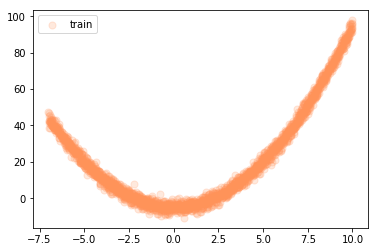

In [16]:
x = np.linspace(-7, 10, N_SAMPLES)[:, np.newaxis]
noise = np.random.normal(0, 2, x.shape)
y = np.square(x) - 5 + noise

test_x = np.linspace(-7, 10, 200)[:, np.newaxis]
noise = np.random.normal(0, 2, test_x.shape)
test_y = np.square(test_x) - 5 + noise

train_x, train_y = torch.from_numpy(x).float(), torch.from_numpy(y).float()
test_x = Variable(torch.from_numpy(test_x).float(), volatile=True)  
test_y = Variable(torch.from_numpy(test_y).float(), volatile=True)

train_dataset = Data.TensorDataset(train_x, train_y)
train_loader = Data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)

plt.scatter(train_x.numpy(), train_y.numpy(), c='#FF9359', s=50, alpha=0.2, label='train')
plt.legend(loc='upper left')

In [28]:
class Net(nn.Module):
    def __init__(self,batch_normalization=False):
        super(Net,self).__init__()
        self.do_bn=batch_normalization
        self.fcs=[]
        self.bns=[]
        self.bn_input=nn.BatchNorm1d(1,momentum=0.5)
        
        for i in range(N_HIDDEN):
            input_size=1 if i==0 else 10
            fc=nn.Linear(input_size,10)
            setattr(self,'fc%i'%i,fc)
            self._set_init(fc)
            self.fcs.append(fc)
            if self.do_bn:
                bn=nn.BatchNorm1d(10,momentum=0.5)
                setattr(self,'bn%i'%i,bn)
                self.bns.append(bn)
        self.predict=nn.Linear(10,1)
        self._set_init(self.predict)
    def _set_init(self,layer):
        init.normal(layer.weight,mean=0,std=.1)
        init.constant(layer.bias,B_INIT)
    def forward(self,x):
        pre_activation=[x]
        if self.do_bn: x=self.bn_input(x)
        layer_input=[x]
        for i in range(N_HIDDEN):
            x=self.fcs[i](x)
            pre_activation.append(x)
            if self.do_bn: x=self.bns[i](x)
            x=ACTIVATION(x)
            layer_input.append(x)
        out=self.predict(x)
        return out,layer_input,pre_activation

In [29]:
nets = [Net(batch_normalization=False), Net(batch_normalization=True)]

print(*nets)

Net(
  (bn_input): BatchNorm1d(1, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (fc0): Linear(in_features=1, out_features=10, bias=True)
  (fc1): Linear(in_features=10, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=10, bias=True)
  (fc6): Linear(in_features=10, out_features=10, bias=True)
  (fc7): Linear(in_features=10, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
) Net(
  (bn_input): BatchNorm1d(1, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (fc0): Linear(in_features=1, out_features=10, bias=True)
  (bn0): BatchNorm1d(10, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=10, out_features=10, bias=True)
  (bn1): BatchNorm1d(10, eps=1e-05, momentum=0.5, af

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.


In [30]:
opts=[torch.optim.Adam(net.parameters(),lr=LR) for net in nets]
loss_func=torch.nn.MSELoss()

Epoch: 0


C:\Users\GDD\Anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


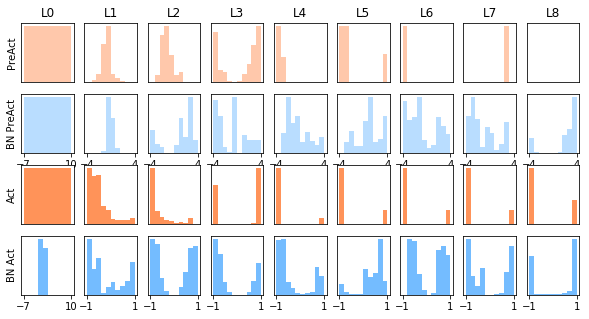

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


In [34]:
f,axs=plt.subplots(4,N_HIDDEN+1,figsize=(10,5))
plt.ion()  
def plot_histogram(l_in,l_in_bn,pre_ac,pre_ac_bn):
    for i,(ax_pa,ax_pa_bn,ax,ax_bn) in enumerate(zip(axs[0,:],axs[1,:],axs[2,:],axs[3,:])):
        [a.clear() for a in [ax_pa, ax_pa_bn, ax, ax_bn]]
        if i == 0: p_range = (-7, 10);the_range = (-7, 10)
        else:p_range = (-4, 4);the_range = (-1, 1)
        ax_pa.set_title('L' + str(i))
        ax_pa.hist(pre_ac[i].data.numpy().ravel(), bins=10, range=p_range, color='#FF9359', alpha=0.5);ax_pa_bn.hist(pre_ac_bn[i].data.numpy().ravel(), bins=10, range=p_range, color='#74BCFF', alpha=0.5)
        ax.hist(l_in[i].data.numpy().ravel(), bins=10, range=the_range, color='#FF9359');ax_bn.hist(l_in_bn[i].data.numpy().ravel(), bins=10, range=the_range, color='#74BCFF')
        for a in [ax_pa, ax, ax_pa_bn, ax_bn]: a.set_yticks(());a.set_xticks(())
        ax_pa_bn.set_xticks(p_range);ax_bn.set_xticks(the_range)
        axs[0, 0].set_ylabel('PreAct');axs[1, 0].set_ylabel('BN PreAct');axs[2, 0].set_ylabel('Act');axs[3, 0].set_ylabel('BN Act')
    plt.pause(0.01)
    
losses=[[],[]]
for epoch in range(EPOCH):
    print('Epoch:',epoch)
    layer_inputs,pre_acts=[],[]
    for net,l in zip(nets,losses):
        net.eval()
        pred,layer_input,pre_act=net(test_x)
        l.append(loss_func(pred,test_y).data[0])
        layer_inputs.append(layer_input)
        pre_acts.append(pre_act)
        net.train()
    plot_histogram(*layer_inputs,*pre_acts)
    
    for step,(b_x,b_y) in enumerate(train_loader):
        b_x,b_y=Variable(b_x),Variable(b_y)
        for net,opt in zip(nets,opts):
            pred,_,_=net(b_x)
            loss=loss_func(pred,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
plt.ioff()

C:\Users\GDD\Anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


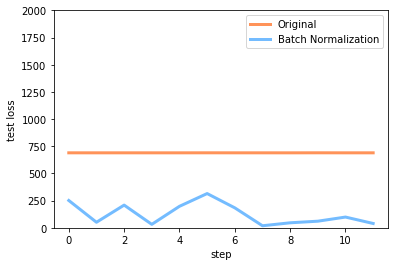

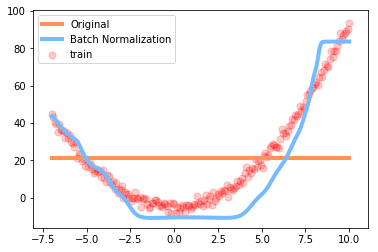

In [35]:
# plot training loss
plt.figure(2)
plt.plot(losses[0], c='#FF9359', lw=3, label='Original')
plt.plot(losses[1], c='#74BCFF', lw=3, label='Batch Normalization')
plt.xlabel('step');plt.ylabel('test loss');plt.ylim((0, 2000));plt.legend(loc='best')

# evaluation
# set net to eval mode to freeze the parameters in batch normalization layers
[net.eval() for net in nets]    # set eval mode to fix moving_mean and moving_var
preds = [net(test_x)[0] for net in nets]
plt.figure(3)
plt.plot(test_x.data.numpy(), preds[0].data.numpy(), c='#FF9359', lw=4, label='Original')
plt.plot(test_x.data.numpy(), preds[1].data.numpy(), c='#74BCFF', lw=4, label='Batch Normalization')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='r', s=50, alpha=0.2, label='train')
plt.legend(loc='best')
plt.show()